In [3]:
import xarray as xr
import glob
import os

# Coordenadas de recorte
lon_min, lon_max = -84.6, -45
lat_min, lat_max = 23, 43

# Lista de archivos
archivos = sorted(glob.glob("*.nc"))
recortes = []

for f in archivos:
    print(f"Procesando {f} ...")
    
    # Abrir con lazy loading
    ds = xr.open_dataset(f, chunks={})
    
    # Detectar si lat/lon están ascendentes o descendentes
    lat_coord = ds.coords['lat']
    lon_coord = ds.coords['lon']
    
    lat_slice = slice(lat_min, lat_max) if lat_coord[0] < lat_coord[-1] else slice(lat_max, lat_min)
    lon_slice = slice(lon_min, lon_max) if lon_coord[0] < lon_coord[-1] else slice(lon_max, lon_min)
    
    # Hacer recorte
    ds_recorte = ds.sel(lat=lat_slice, lon=lon_slice)
    
    # Guardar recorte temporal
    nombre_salida = f"recorte_{os.path.basename(f)}"
    ds_recorte.to_netcdf(nombre_salida)
    recortes.append(nombre_salida)
    
    ds.close()
    print(f"✅ Guardado {nombre_salida}")

print("🧩 Todos los recortes individuales listos.")


Procesando AQUA_MODIS.20020621_20200920.L3m.SCSU.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020621_20200920.L3m.SCSU.CHL.chlor_a.4km.nc
Procesando AQUA_MODIS.20020621_20210920.L3m.SCSU.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020621_20210920.L3m.SCSU.CHL.chlor_a.4km.nc
Procesando AQUA_MODIS.20020621_20220920.L3m.SCSU.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020621_20220920.L3m.SCSU.CHL.chlor_a.4km.nc
Procesando AQUA_MODIS.20020621_20230920.L3m.SCSU.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020621_20230920.L3m.SCSU.CHL.chlor_a.4km.nc
Procesando AQUA_MODIS.20020621_20240920.L3m.SCSU.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020621_20240920.L3m.SCSU.CHL.chlor_a.4km.nc
Procesando AQUA_MODIS.20020701_20210731.L3m.MC.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020701_20210731.L3m.MC.CHL.chlor_a.4km.nc
Procesando AQUA_MODIS.20020701_20220731.L3m.MC.CHL.chlor_a.4km.nc ...
✅ Guardado recorte_AQUA_MODIS.20020701_2022073

KeyError: "No variable named 'lat'. Variables on the dataset include []"

In [ ]:
recortes_ds = [xr.open_dataset(r) for r in recortes]
final = xr.combine_by_coords(recortes_ds, combine_attrs="override")

final.to_netcdf("recorte_final.nc")
print("✅ Recorte combinado guardado como 'recorte_final.nc'")

✅ Recorte combinado guardado como 'recorte_final.nc'


In [15]:
import xarray as xr

ds = xr.open_dataset("AQUA_MODIS.20130307.L3m.DAY.CHL.chlor_a.4km.nc")  # tu archivo original
print(ds)


<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20130307.L3m.DAY.CHL.chlor_a...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemist

In [17]:
import xarray as xr

archivo = "AQUA_MODIS.20130307.L3m.DAY.CHL.chlor_a.4km.nc"
ds = xr.open_dataset(archivo)
print(ds)

# Coordenadas de recorte
lon_min, lon_max = -84.6, -45
lat_min, lat_max = 23, 43

# Ajustar slices según orden de coordenadas
lat_slice = slice(lat_min, lat_max) if ds['lat'][0] < ds['lat'][-1] else slice(lat_max, lat_min)
lon_slice = slice(lon_min, lon_max) if ds['lon'][0] < ds['lon'][-1] else slice(lon_max, lon_min)

# Recorte
ds_recorte = ds.sel(lat=lat_slice, lon=lon_slice)

# Guardar
ds_recorte.to_netcdf("recorte_prueba.nc")
print("✅ Recorte guardado como recorte_prueba.nc")


<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20130307.L3m.DAY.CHL.chlor_a...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemist

In [18]:
import xarray as xr

ds = xr.open_dataset("recorte_prueba.nc")
print(ds)

<xarray.Dataset> Size: 2MB
Dimensions:  (lat: 480, lon: 950, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 2kB 42.98 42.94 42.9 42.85 ... 23.15 23.1 23.06 23.02
  * lon      (lon) float32 4kB -84.56 -84.52 -84.48 ... -45.1 -45.06 -45.02
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 2MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20130307.L3m.DAY.CHL.chlor_a...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr..

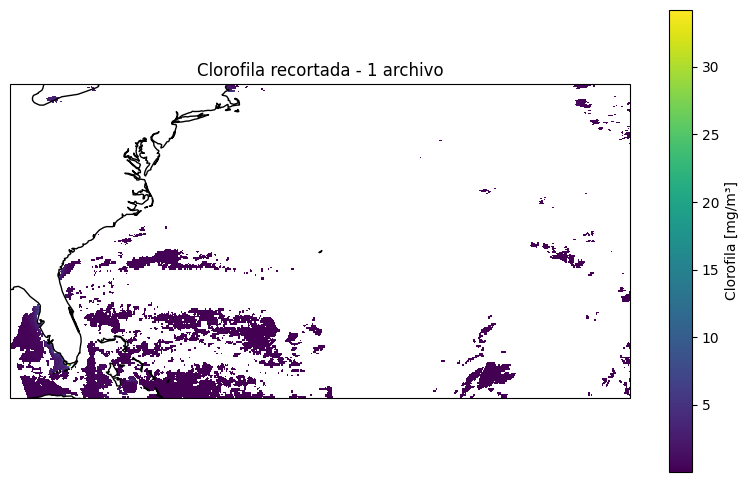

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Abrir el recorte
ds = xr.open_dataset("recorte_AQUA_MODIS.20130101.L3m.DAY.CHL.chlor_a.4km.nc")

# Seleccionar la variable de clorofila
chl = ds['chlor_a']

# Graficar
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
chl.plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Clorofila [mg/m³]'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Clorofila recortada - 1 archivo")
plt.show()

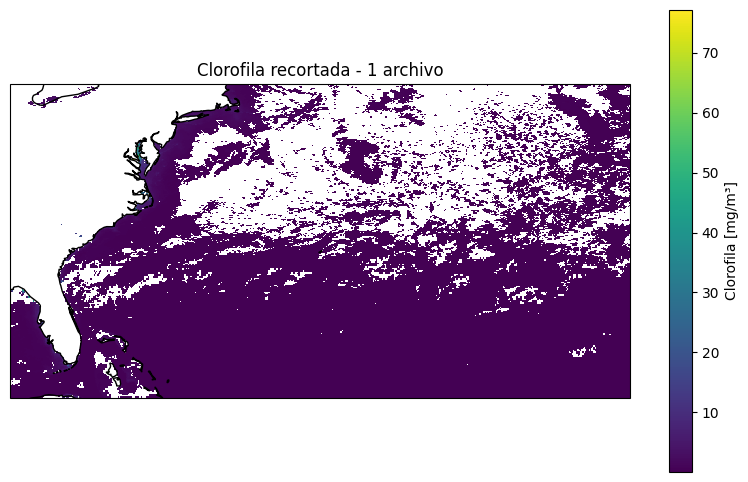

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Abrir el recorte
ds = xr.open_dataset("recorte_AQUA_MODIS.20130101_20130108.L3m.8D.CHL.chlor_a.4km.nc")

# Seleccionar la variable de clorofila
chl = ds['chlor_a']

# Graficar
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
chl.plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Clorofila [mg/m³]'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Clorofila recortada - 1 archivo")
plt.show()

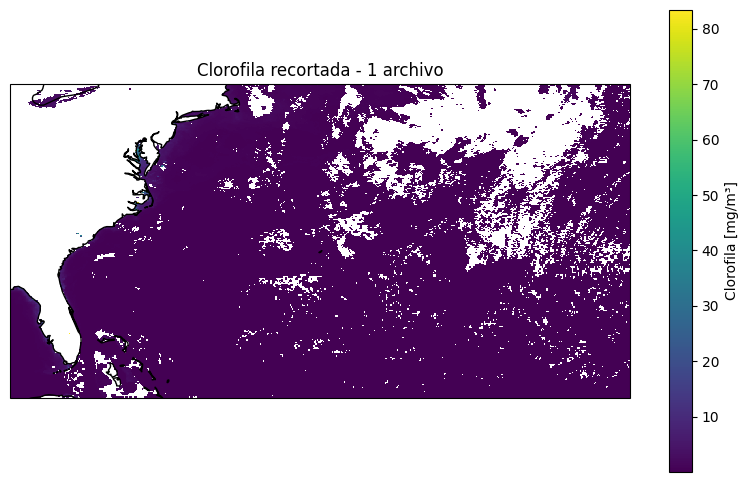

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Abrir el recorte
ds = xr.open_dataset("recorte_AQUA_MODIS.20130109_20130116.L3m.8D.CHL.chlor_a.4km.nc")

# Seleccionar la variable de clorofila
chl = ds['chlor_a']

# Graficar
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
chl.plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Clorofila [mg/m³]'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Clorofila recortada - 1 archivo")
plt.show()

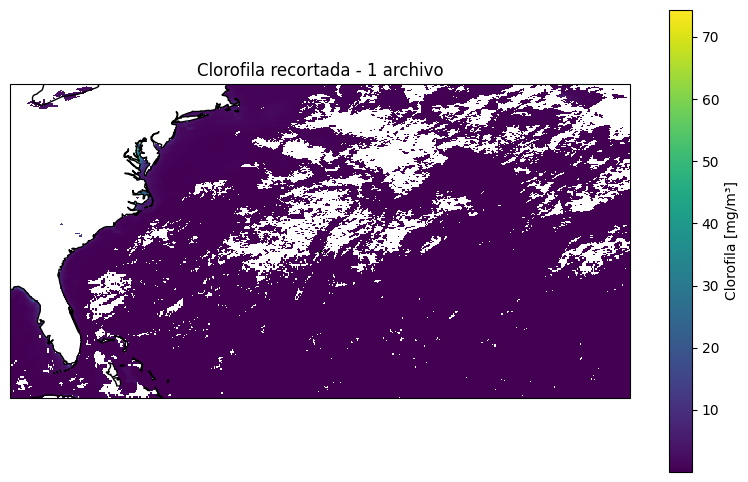

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Abrir el recorte
ds = xr.open_dataset("recorte_AQUA_MODIS.20130117_20130124.L3m.8D.CHL.chlor_a.4km.nc")

# Seleccionar la variable de clorofila
chl = ds['chlor_a']

# Graficar
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
chl.plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Clorofila [mg/m³]'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Clorofila recortada - 1 archivo")
plt.show()

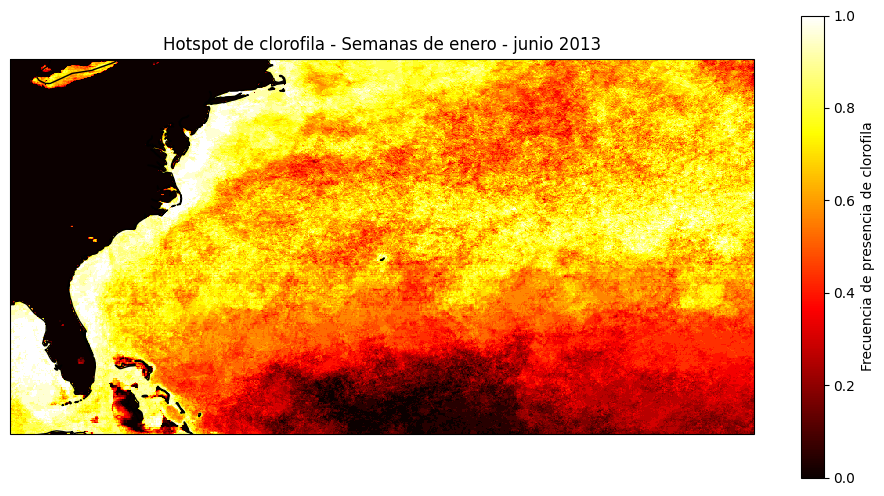

In [32]:
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Archivos de recorte semanal
archivos = sorted(glob.glob("recorte_AQUA_MODIS.*8D.CHL*.nc"))

# Lista para guardar los DataArrays
chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semanas de enero - junio 2013")
plt.show()


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as sg
import geopandas as gpd

# hotmap ya está en memoria (tu hotmap = frecuencia de presencia)
# Umbral de frecuencia para definir "áreas densas"
umbral = 0.5

# Generar contornos
contours = plt.contour(hotmap.lon, hotmap.lat, hotmap.values, levels=[umbral])

# Lista para guardar los polígonos como puntos
polygons_points = []

for collection in contours.collections:
    for path in collection.get_paths():
        vertices = path.vertices  # array Nx2: [[lon, lat], ...]
        polygons_points.append(vertices)

plt.close()  # cerrar la figura de matplotlib

# Convertir a GeoDataFrame (cada polígono es un registro)
gdf_polygons = gpd.GeoDataFrame({
    'geometry': [sg.Polygon(p) for p in polygons_points]
})

# Guardar como GeoJSON listo para Mapbox
gdf_polygons.to_file("clorofila_contornos.geojson", driver="GeoJSON")

# Mostrar info de los polígonos
for i, pts in enumerate(polygons_points):
    print(f"Polígono {i+1}, puntos: {len(pts)}")
    print(pts[:5], "...")  # primeros 5 puntos


C:\Users\Quinteros\AppData\Local\Temp\ipykernel_27132\1603685782.py:16: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for collection in contours.collections:
c:\Python39\lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Polígono 1, puntos: 66642
[[-69.04166412  42.97916412]
 [-69.02082825  42.95833206]
 [-68.99999619  42.97916412]
 [-68.74999619  42.97916412]
 [-68.72916412  42.95833206]] ...


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

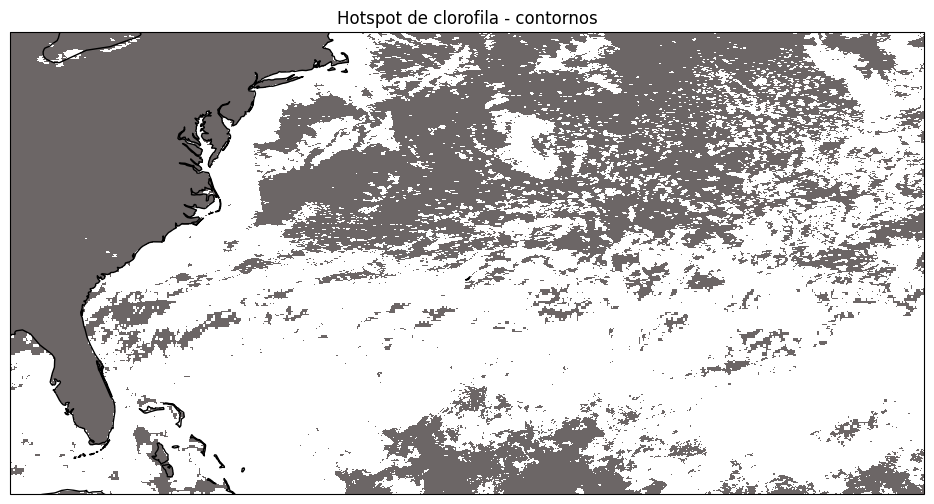

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
from descartes import PolygonPatch

# Crear figura con proyección geográfica
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar mapa base
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - contornos")

# Dibujar el hotmap de fondo (frecuencia)
im = ax.pcolormesh(hotmap.lon, hotmap.lat, hotmap.values, cmap='hot', shading='auto', alpha=0.6)

# Dibujar los polígonos (contornos)
for poly_pts in polygons_points:
    polygon = Polygon(poly_pts)
    patch = PolygonPatch(polygon, facecolor='none', edgecolor='blue', linewidth=2)
    ax.add_patch(patch)

# Agregar colorbar
plt.colorbar(im, ax=ax, orientation='vertical', label='Frecuencia de presencia de clorofila')

plt.show()


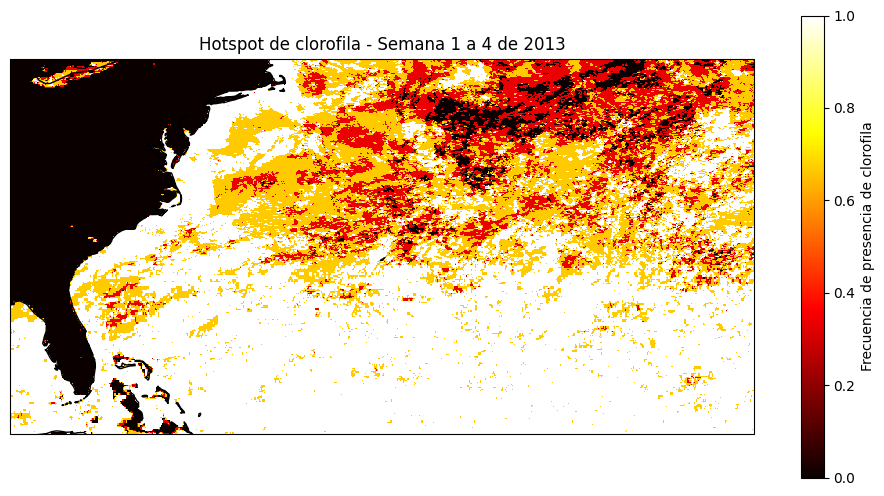

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130101_20130108.L3m.8D.CHL.chlor_a.4km.nc",
     "recorte_AQUA_MODIS.20130109_20130116.L3m.8D.CHL.chlor_a.4km.nc",
     "recorte_AQUA_MODIS.20130117_20130124.L3m.8D.CHL.chlor_a.4km.nc",
    # "recorte_AQUA_MODIS.20130125_20130201.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.005).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 1 a 4 de 2013")
plt.show()

     densidad_fito        lat        lon
331            1.0  42.979164 -70.770828
332            1.0  42.979164 -70.729164
333            1.0  42.979164 -70.687500
334            1.0  42.979164 -70.645828
335            1.0  42.979164 -70.604164
Total puntos válidos: 368159


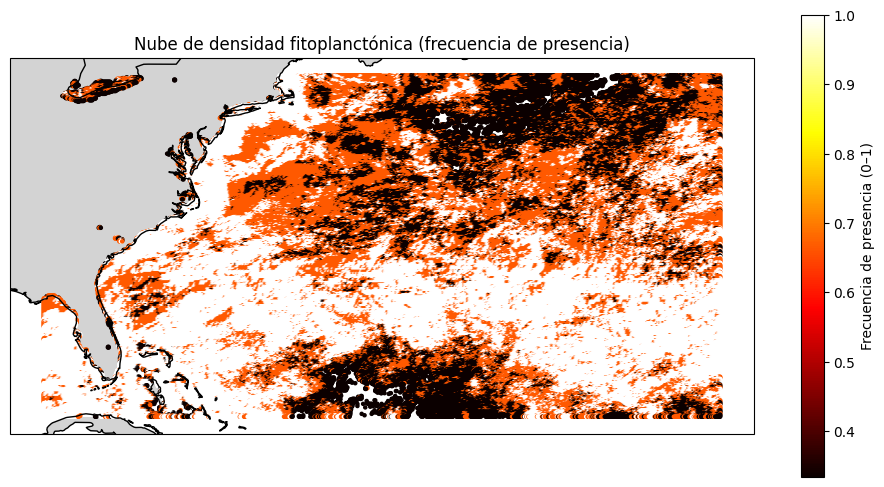

In [41]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np

# -----------------------------------------------------------
# 1️⃣ Cargar los archivos NetCDF y generar mapa de frecuencia
# -----------------------------------------------------------
archivos = [
    "recorte_AQUA_MODIS.20130101_20130108.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130109_20130116.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130117_20130124.L3m.8D.CHL.chlor_a.4km.nc",
    # "recorte_AQUA_MODIS.20130125_20130201.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []
for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds["chlor_a"]
    chl_mask = (chl > 0.05).astype(int)  # máscara binaria
    chl_list.append(chl_mask)
    ds.close()

chl_stack = xr.concat(chl_list, dim="week")
hotmap = chl_stack.mean(dim="week")  # frecuencia media (0–1)

# -----------------------------------------------------------
# 2️⃣ Convertir mapa a DataFrame plano
# -----------------------------------------------------------
# Obtener coordenadas y valores
lats = hotmap["lat"].values
lons = hotmap["lon"].values
vals = hotmap.values

# Crear malla de coordenadas
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Aplanar todo
df_hot = pd.DataFrame({
    "densidad_fito": vals.flatten(),
    "lat": lat_grid.flatten(),
    "lon": lon_grid.flatten()
})

# Eliminar valores nulos o cero (sin presencia)
df_hot = df_hot[df_hot["densidad_fito"] > 0]

print(df_hot.head())
print(f"Total puntos válidos: {len(df_hot)}")

# -----------------------------------------------------------
# 3️⃣ Graficar como nube de puntos (densidad)
# -----------------------------------------------------------
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter con tamaño proporcional a densidad
sc = plt.scatter(
    df_hot["lon"], df_hot["lat"],
    c=df_hot["densidad_fito"], cmap="hot", s=5,
    transform=ccrs.PlateCarree()
)

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.set_title("Nube de densidad fitoplanctónica (frecuencia de presencia)")
plt.colorbar(sc, label="Frecuencia de presencia (0–1)")
plt.show()


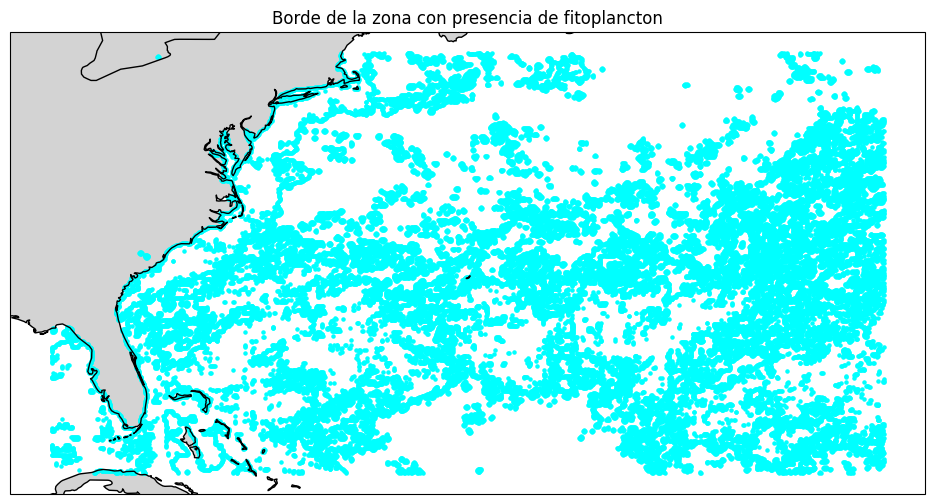

In [44]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion

# -----------------------------------------------------------
# 1️⃣ Cargar los archivos NetCDF y generar mapa de frecuencia
# -----------------------------------------------------------
archivos = [
    "recorte_AQUA_MODIS.20130101_20130108.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130109_20130116.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130117_20130124.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130125_20130201.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []
for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds["chlor_a"]
    chl_mask = (chl > 0.05).astype(int)  # máscara binaria
    chl_list.append(chl_mask)
    ds.close()

chl_stack = xr.concat(chl_list, dim="week")
hotmap = chl_stack.mean(dim="week")  # frecuencia media (0–1)

# -----------------------------------------------------------
# 2️⃣ Crear máscara del área con presencia de fitoplancton
# -----------------------------------------------------------
mask = hotmap.values > 0.95
border = binary_dilation(mask) ^ mask  # borde de la zona activa

# Obtener coordenadas correspondientes
lats = hotmap["lat"].values
lons = hotmap["lon"].values
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Filtrar los puntos del borde
lat_border = lat_grid[border]
lon_border = lon_grid[border]

# -----------------------------------------------------------
# 3️⃣ Graficar solo el borde
# -----------------------------------------------------------
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.scatter(lon_border, lat_border, color="cyan", s=5, transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.set_title("Borde de la zona con presencia de fitoplancton")
plt.show()


Mes 201301:


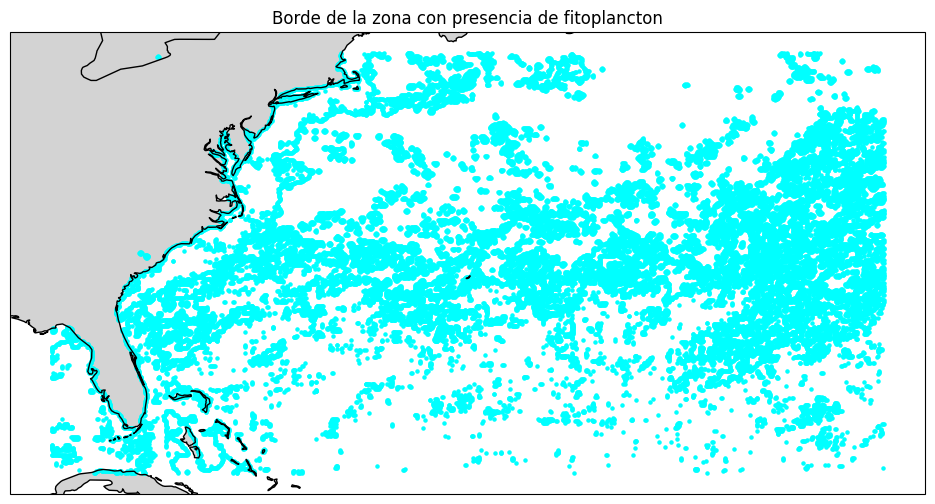

Mes 201302:


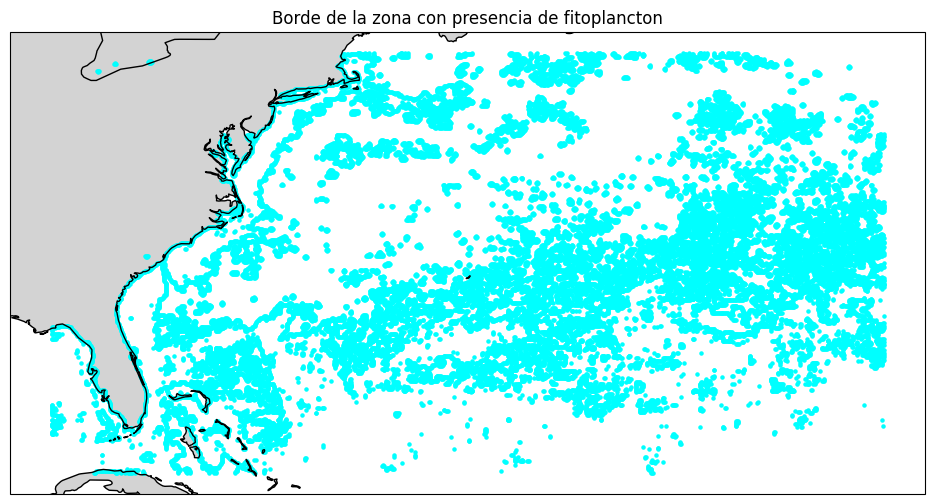

Mes 201303:


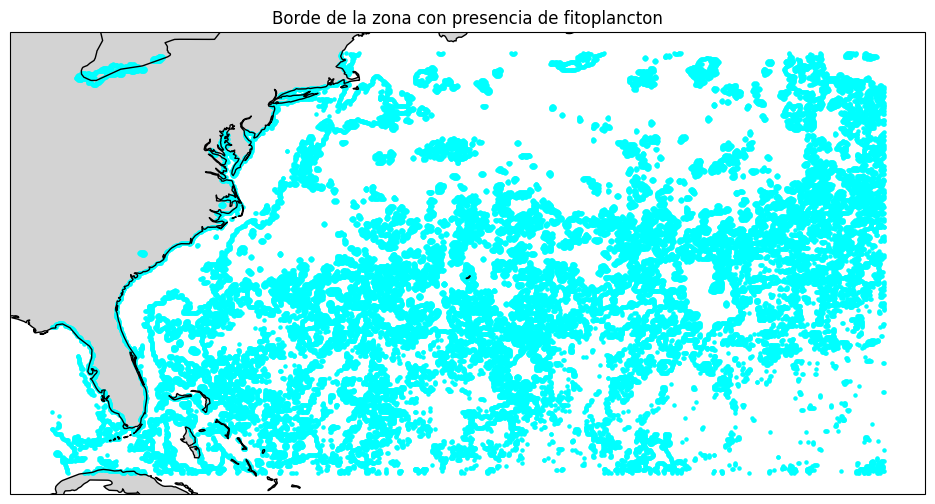

Mes 201304:


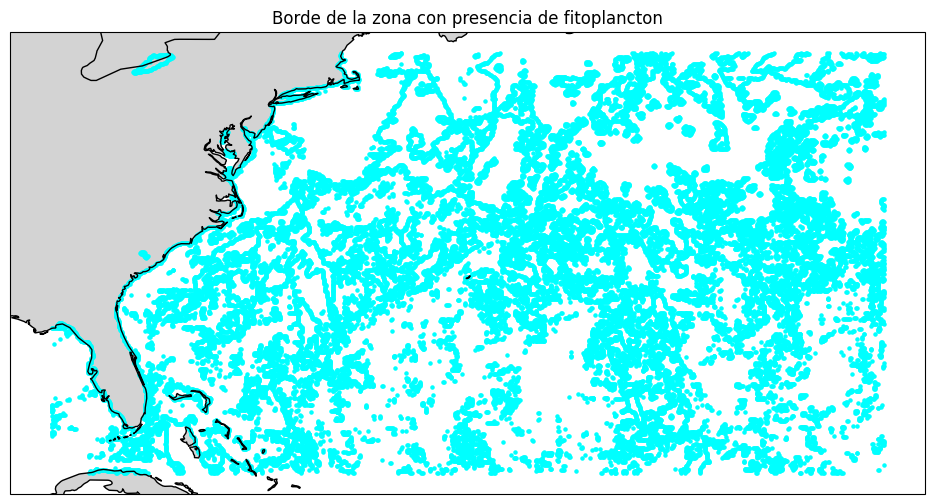

Mes 201305:


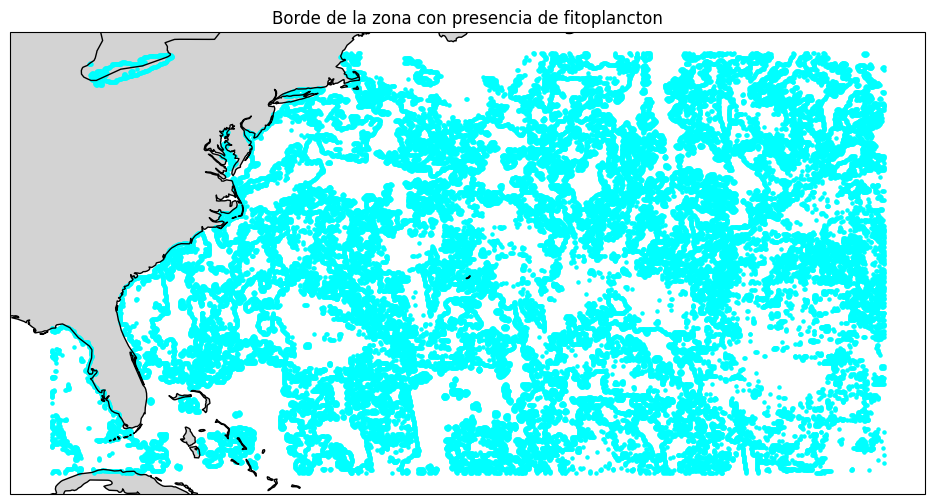

Mes 201306:


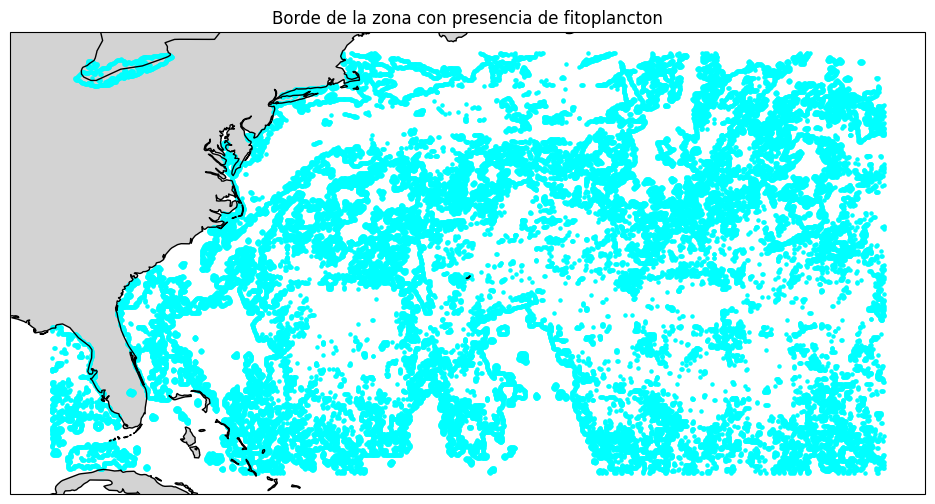

In [ ]:

import os
from collections import defaultdict
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion

# Ruta a la carpeta que contiene los archivos
carpeta = "data_max"  # <-- CAMBIA esto por la ruta real

# Obtener todos los archivos .nc en la carpeta
archivos = [f for f in os.listdir(carpeta) if f.endswith(".nc")]

# Diccionario para agrupar archivos por mes
archivos_por_mes = defaultdict(list)

for archivo in archivos:
    try:
        # Extraer la fecha de inicio del nombre del archivo
        partes = archivo.split('.')
        fecha_inicio = partes[1].split('_')[0]  # ejemplo: "20130101"
        mes = fecha_inicio[:6]  # ejemplo: "201301"

        archivos_por_mes[mes].append(archivo)
    except IndexError:
        print(f"Formato inesperado en archivo: {archivo}")

data_clorofile = {} 
# Mostrar resultados
for mes in sorted(archivos_por_mes):
        print(f"Mes {mes}:")
        
        chl_list = []
        for f in archivos_por_mes[mes]:
            ds = xr.open_dataset(f)
            chl = ds["chlor_a"]
            chl_mask = (chl > 0.005).astype(int)  # máscara binaria
            chl_list.append(chl_mask)
            ds.close()

        chl_stack = xr.concat(chl_list, dim="week")
        hotmap = chl_stack.mean(dim="week")  # frecuencia media (0–1)

        # -----------------------------------------------------------
        # 2️⃣ Crear máscara del área con presencia de fitoplancton
        # -----------------------------------------------------------
        mask = hotmap.values > 0.9
        border = binary_dilation(mask) ^ mask  # borde de la zona activa

        # Obtener coordenadas correspondientes
        lats = hotmap["lat"].values
        lons = hotmap["lon"].values
        lon_grid, lat_grid = np.meshgrid(lons, lats)

        # Filtrar los puntos del borde
        lat_border = lat_grid[border]
        lon_border = lon_grid[border]

        # -----------------------------------------------------------
        # 3️⃣ Graficar solo el borde
        # -----------------------------------------------------------
        plt.figure(figsize=(12,6))
        ax = plt.axes(projection=ccrs.PlateCarree())

        plt.scatter(lon_border, lat_border, color="cyan", s=5, transform=ccrs.PlateCarree())

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND, facecolor="lightgray")
        ax.set_title("Borde de la zona con presencia de fitoplancton")
        plt.show()   
        data_clorofile[mes] = (lon_border, lat_border)


In [59]:
import joblib
data_clorofile
#save as data_clorofile
joblib.dump(data_clorofile, 'C:\\Users\\josep\\OneDrive\\Escritorio\\space app\\data_map\\data_clorofile.pkl')

['C:\\Users\\josep\\OneDrive\\Escritorio\\space app\\data_map\\data_clorofile.pkl']

In [57]:
data_clorofile["201301"][1]

array([42.979164, 42.979164, 42.979164, ..., 23.020832, 23.020832,
       23.020832], dtype=float32)

In [54]:
data_clorofile

{'201301': (array([-70.8125  , -69.354164, -69.229164, ..., -72.6875  , -59.729164,
         -53.39583 ], dtype=float32),
  array([42.979164, 42.979164, 42.979164, ..., 23.020832, 23.020832,
         23.020832], dtype=float32)),
 '201302': (array([-70.02083 , -69.979164, -69.9375  , ..., -56.062496, -56.02083 ,
         -55.979164], dtype=float32),
  array([42.979164, 42.979164, 42.979164, ..., 23.020832, 23.020832,
         23.020832], dtype=float32)),
 '201303': (array([-70.8125  , -70.5625  , -69.9375  , ..., -45.354164, -45.27083 ,
         -45.187496], dtype=float32),
  array([42.979164, 42.979164, 42.979164, ..., 23.020832, 23.020832,
         23.020832], dtype=float32)),
 '201304': (array([-70.8125  , -67.979164, -67.9375  , ..., -47.062496, -47.02083 ,
         -46.979164], dtype=float32),
  array([42.979164, 42.979164, 42.979164, ..., 23.020832, 23.020832,
         23.020832], dtype=float32)),
 '201305': (array([-70.5625  , -70.3125  , -69.979164, ..., -48.02083 , -47.979164,


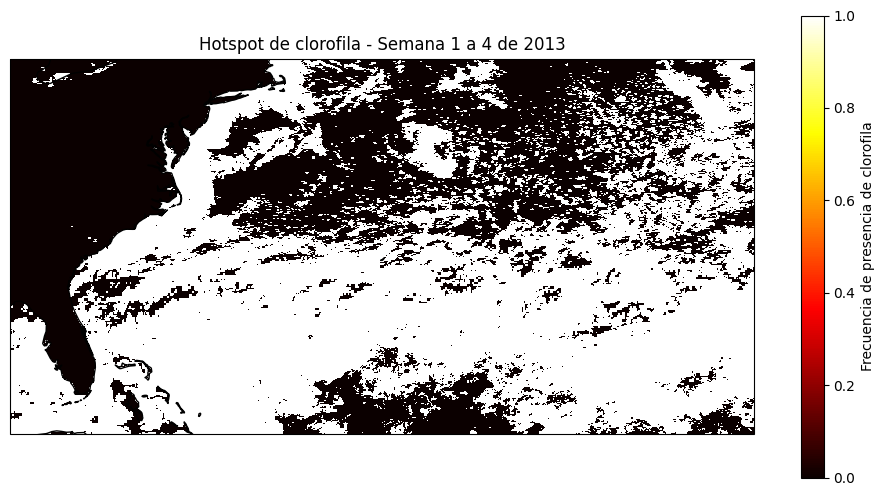

In [41]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130101_20130108.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 1 a 4 de 2013")
plt.show()

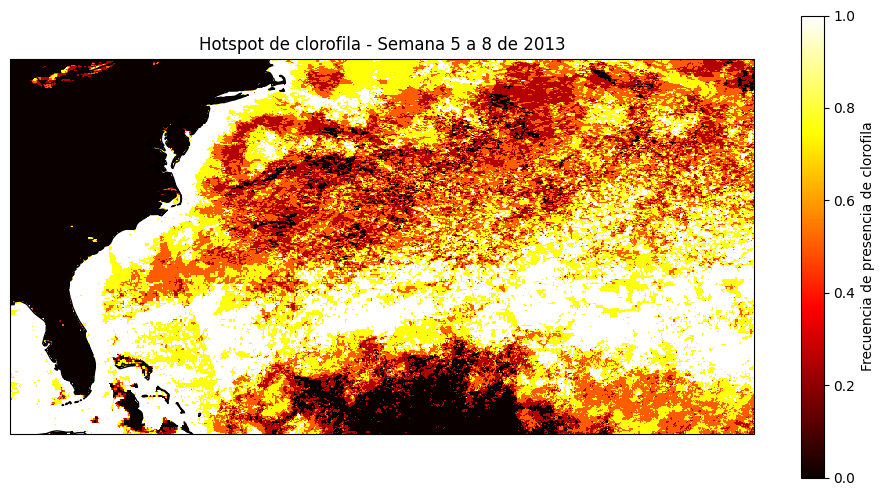

In [37]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130202_20130209.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130210_20130217.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130218_20130225.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130226_20130305.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 5 a 8 de 2013")
plt.show()

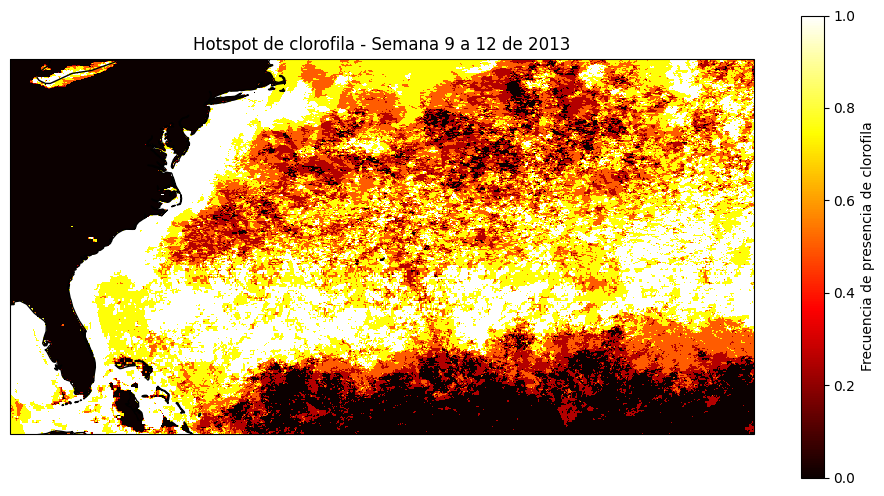

In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130306_20130313.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130314_20130321.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130322_20130329.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130330_20130406.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 9 a 12 de 2013")
plt.show()

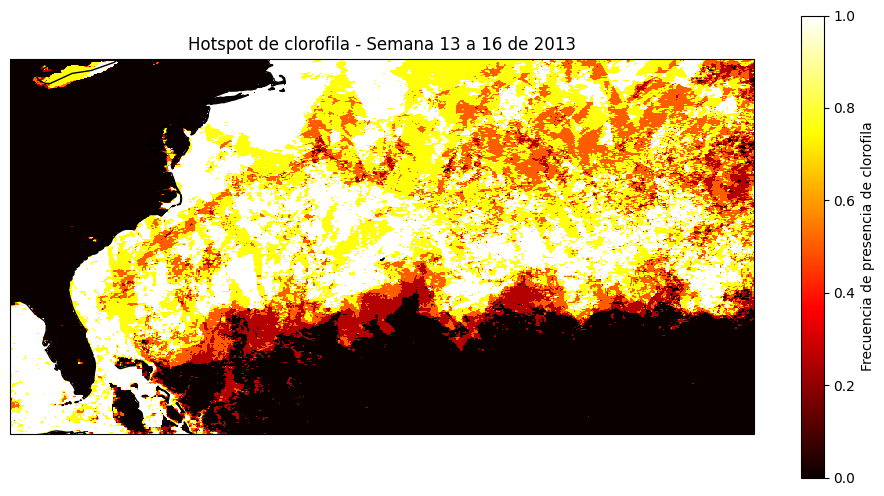

In [39]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130407_20130414.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130415_20130422.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130423_20130430.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130501_20130508.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 13 a 16 de 2013")
plt.show()

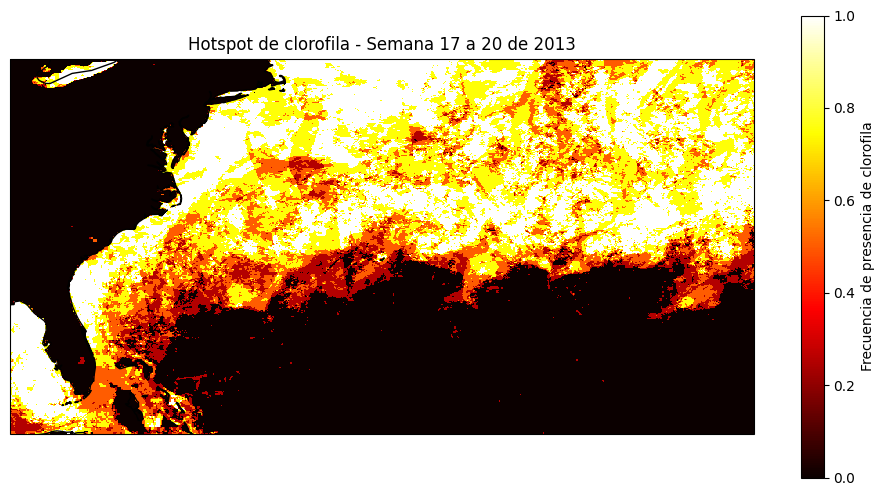

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130509_20130516.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130517_20130524.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130525_20130601.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130602_20130609.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 17 a 20 de 2013")
plt.show()

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130517_20130524.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130525_20130601.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130525_20130601.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130602_20130609.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semanas de mayo 2013")
plt.show()

# data humedal 

Procesando archivo: HUM_20130101_20130108.nc
Procesando archivo: HUM_20130109_20130116.nc
Procesando archivo: HUM_20130117_20130124.nc
Procesando archivo: HUM_20130125_20130201.nc
Procesando archivo: HUM_20130202_20130209.nc
Procesando archivo: HUM_20130210_20130217.nc
Procesando archivo: HUM_20130218_20130225.nc
Procesando archivo: HUM_20130226_20130305.nc
Procesando archivo: HUM_20130306_20130313.nc
Procesando archivo: HUM_20130314_20130321.nc
Procesando archivo: HUM_20130322_20130329.nc
Procesando archivo: HUM_20130330_20130406.nc
Procesando archivo: HUM_20130407_20130414.nc
Procesando archivo: HUM_20130415_20130422.nc
Procesando archivo: HUM_20130423_20130430.nc
Procesando archivo: HUM_20130501_20130508.nc
Procesando archivo: HUM_20130509_20130516.nc
Procesando archivo: HUM_20130517_20130524.nc
Procesando archivo: HUM_20130525_20130601.nc
Procesando archivo: HUM_20130602_20130609.nc
Procesando archivo: HUM_20130610_20130617.nc
Procesando archivo: HUM_20130618_20130625.nc
Mes 201301

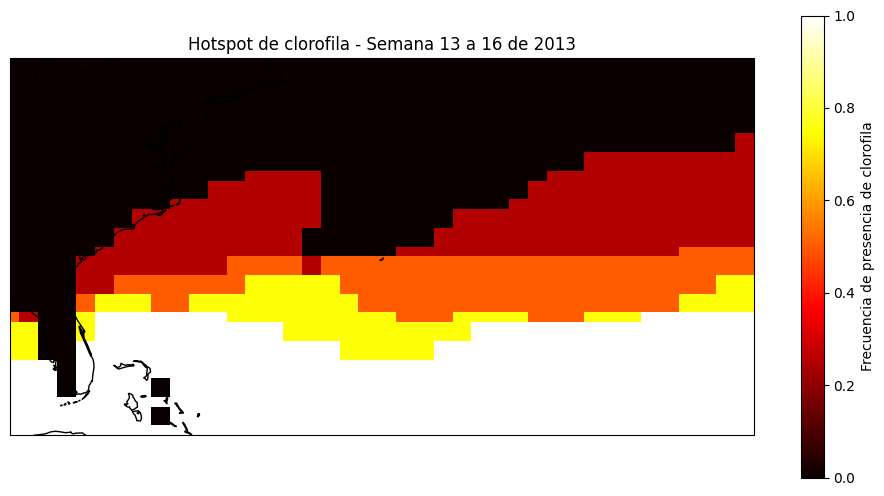

Mes 201302:
  Leyendo HUM_20130202_20130209.nc ...
  Leyendo HUM_20130210_20130217.nc ...
  Leyendo HUM_20130218_20130225.nc ...
  Leyendo HUM_20130226_20130305.nc ...


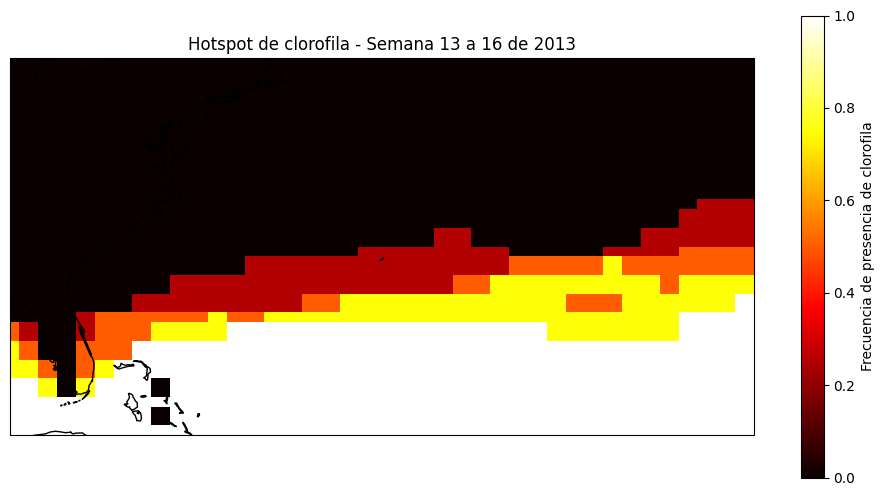

Mes 201303:
  Leyendo HUM_20130306_20130313.nc ...
  Leyendo HUM_20130314_20130321.nc ...
  Leyendo HUM_20130322_20130329.nc ...
  Leyendo HUM_20130330_20130406.nc ...


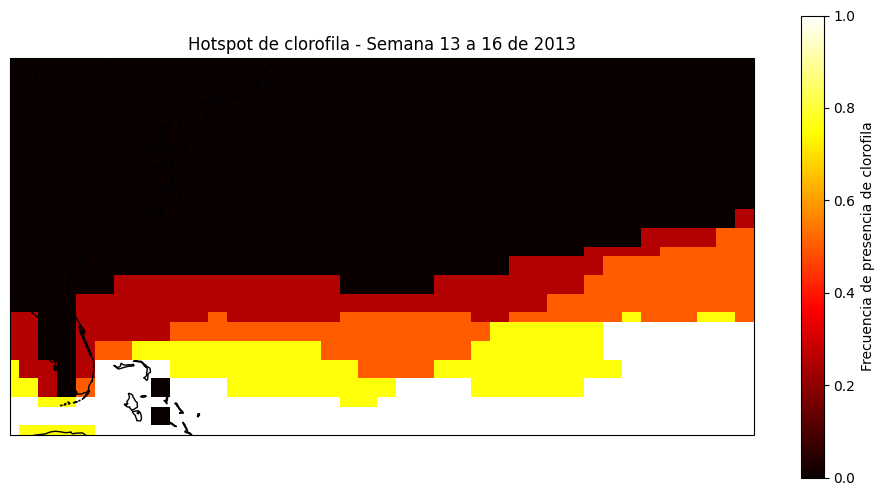

Mes 201304:
  Leyendo HUM_20130407_20130414.nc ...
  Leyendo HUM_20130415_20130422.nc ...
  Leyendo HUM_20130423_20130430.nc ...


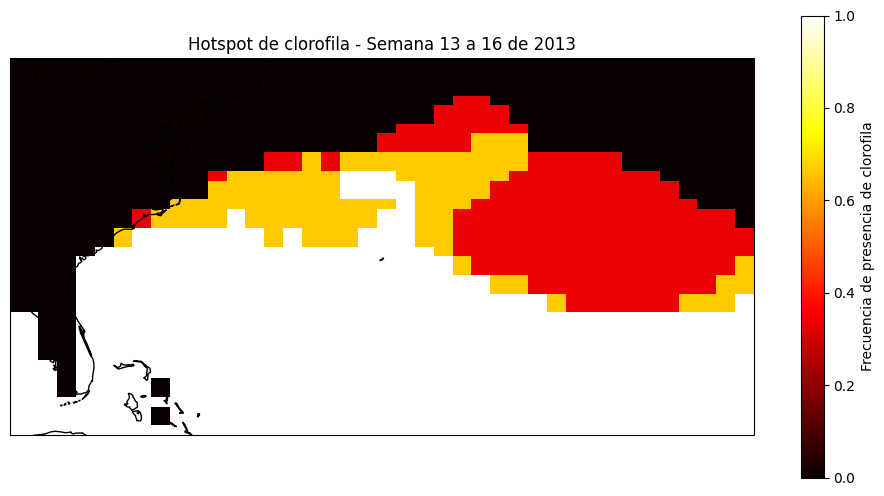

Mes 201305:
  Leyendo HUM_20130501_20130508.nc ...
  Leyendo HUM_20130509_20130516.nc ...
  Leyendo HUM_20130517_20130524.nc ...
  Leyendo HUM_20130525_20130601.nc ...


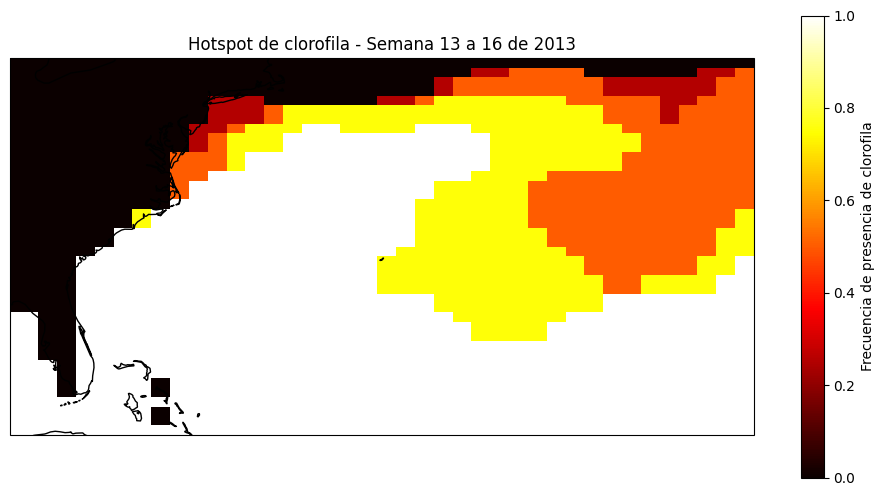

Mes 201306:
  Leyendo HUM_20130602_20130609.nc ...
  Leyendo HUM_20130610_20130617.nc ...
  Leyendo HUM_20130618_20130625.nc ...


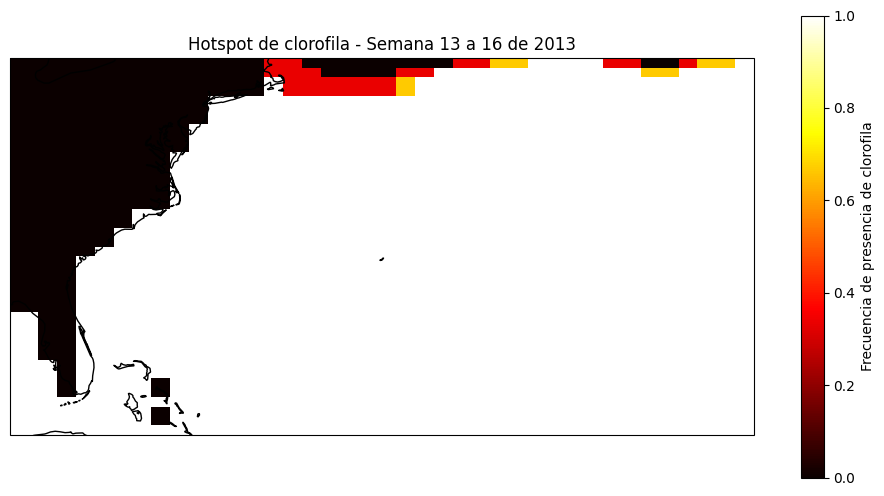

In [ ]:
import os
from collections import defaultdict
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion

# Ruta a la carpeta que contiene los archivos
carpeta = "/data_hum"  # <-- CAMBIA esto por la ruta real

# Obtener todos los archivos .nc en la carpeta con ruta completa
archivos = [os.path.join(carpeta, f) for f in os.listdir(carpeta) if f.endswith(".nc")] 

# Diccionario para agrupar archivos por mes
archivos_por_mes = defaultdict(list)

for archivo in archivos:
    try:
        # Extraer solo el nombre del archivo para procesar la fecha
        nombre_archivo = os.path.basename(archivo)
        print(f"Procesando archivo: {nombre_archivo}")
        # Extraer la fecha de inicio del nombre del archivo
        partes = nombre_archivo.split('.')
        fecha_inicio = partes[0].split('_')[1]  # ejemplo: "20130101"
        mes = fecha_inicio[:6]  # ejemplo: "201301"

        archivos_por_mes[mes].append(archivo)  # Guardar ruta completa
    except IndexError:
        print(f"Formato inesperado en archivo: {os.path.basename(archivo)}")

data_hum = {}  # Diccionario para guardar puntos de humedad
# Mostrar resultados
for mes in sorted(archivos_por_mes):
        print(f"Mes {mes}:")
        
        chl_list = []
        for f in archivos_por_mes[mes]:
            
            print(f"  Leyendo {os.path.basename(f)} ...")
            ds = xr.open_dataset(f)
            chl = ds["EXFaqh"]
            chl_mask = (chl > 0.01).astype(int)  # máscara binaria
            chl_list.append(chl_mask)
            ds.close()

        # Apilar todas las semanas en una dimensión nueva "week"
        chl_stack = xr.concat(chl_list, dim='week')

        # Calcular frecuencia de presencia (0-1)
        hotmap = chl_stack.mean(dim='week')

        # -----------------------------------------------------------
        # Extraer puntos con frecuencia > 0.7
        # -----------------------------------------------------------
        # Crear máscara para puntos con alta frecuencia (> 0.7)
        mask_high = hotmap.values > 0.7
        
        # Obtener coordenadas correspondientes
        lats = hotmap["latitude"].values 
        lons = hotmap["longitude"].values
        lon_grid, lat_grid = np.meshgrid(lons, lats)

        # Filtrar los puntos con alta frecuencia
        lat_high = lat_grid[mask_high]
        lon_high = lon_grid[mask_high]
        
        print(f"  Puntos con frecuencia > 0.7: {len(lat_high)}")
        
        # Guardar en diccionario
        data_hum[mes] = (lon_high, lat_high)

        # -----------------------------------------------------------
        # Graficar hotspot map con puntos destacados
        # -----------------------------------------------------------
        plt.figure(figsize=(16,8))  # Formato horizontal
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        # Mostrar hotmap completo
        im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de humedad'})
        
        # Destacar puntos con frecuencia > 0.7
        if len(lat_high) > 0:
            plt.scatter(lon_high, lat_high, color="cyan", s=10, 
                       transform=ccrs.PlateCarree(), label="Frecuencia > 0.7")
            plt.legend()
        
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND, facecolor="lightgray")
        ax.set_title(f"Hotspot de humedad - Mes {mes}")
        
        # Ajustar límites si hay datos
        if len(lat_high) > 0:
            ax.set_extent([lon_high.min()-1, lon_high.max()+1, 
                          lat_high.min()-1, lat_high.max()+1], 
                         ccrs.PlateCarree())
        
        plt.tight_layout()
        plt.show()

# Mostrar resumen final
print("\n📊 Resumen de puntos extraídos:")
for mes, (lons, lats) in data_hum.items():
    print(f"Mes {mes}: {len(lats)} puntos con frecuencia > 0.7")

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista manual de archivos semanales que sí existen
archivos = [
    "recorte_AQUA_MODIS.20130101_20130108.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130109_20130116.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130117_20130124.L3m.8D.CHL.chlor_a.4km.nc",
    "recorte_AQUA_MODIS.20130125_20130201.L3m.8D.CHL.chlor_a.4km.nc"
]

chl_list = []

for f in archivos:
    ds = xr.open_dataset(f)
    chl = ds['chlor_a']
    # Crear máscara de presencia (> 0.1 mg/m³)
    chl_mask = (chl > 0.05).astype(int)
    chl_list.append(chl_mask)
    ds.close()

# Apilar todas las semanas en una dimensión nueva "week"
chl_stack = xr.concat(chl_list, dim='week')

# Calcular frecuencia de presencia (0-1)
hotmap = chl_stack.mean(dim='week')

# Graficar hotspot map
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de clorofila'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title("Hotspot de clorofila - Semana 1 a 4 de 2013")
plt.show()

Procesando archivo: HUM_20130101_20130108.nc
Procesando archivo: HUM_20130109_20130116.nc
Procesando archivo: HUM_20130117_20130124.nc
Procesando archivo: HUM_20130125_20130201.nc
Procesando archivo: HUM_20130202_20130209.nc
Procesando archivo: HUM_20130210_20130217.nc
Procesando archivo: HUM_20130218_20130225.nc
Procesando archivo: HUM_20130226_20130305.nc
Procesando archivo: HUM_20130306_20130313.nc
Procesando archivo: HUM_20130314_20130321.nc
Procesando archivo: HUM_20130322_20130329.nc
Procesando archivo: HUM_20130330_20130406.nc
Procesando archivo: HUM_20130407_20130414.nc
Procesando archivo: HUM_20130415_20130422.nc
Procesando archivo: HUM_20130423_20130430.nc
Procesando archivo: HUM_20130501_20130508.nc
Procesando archivo: HUM_20130509_20130516.nc
Procesando archivo: HUM_20130517_20130524.nc
Procesando archivo: HUM_20130525_20130601.nc
Procesando archivo: HUM_20130602_20130609.nc
Procesando archivo: HUM_20130610_20130617.nc
Procesando archivo: HUM_20130618_20130625.nc
Mes 201301

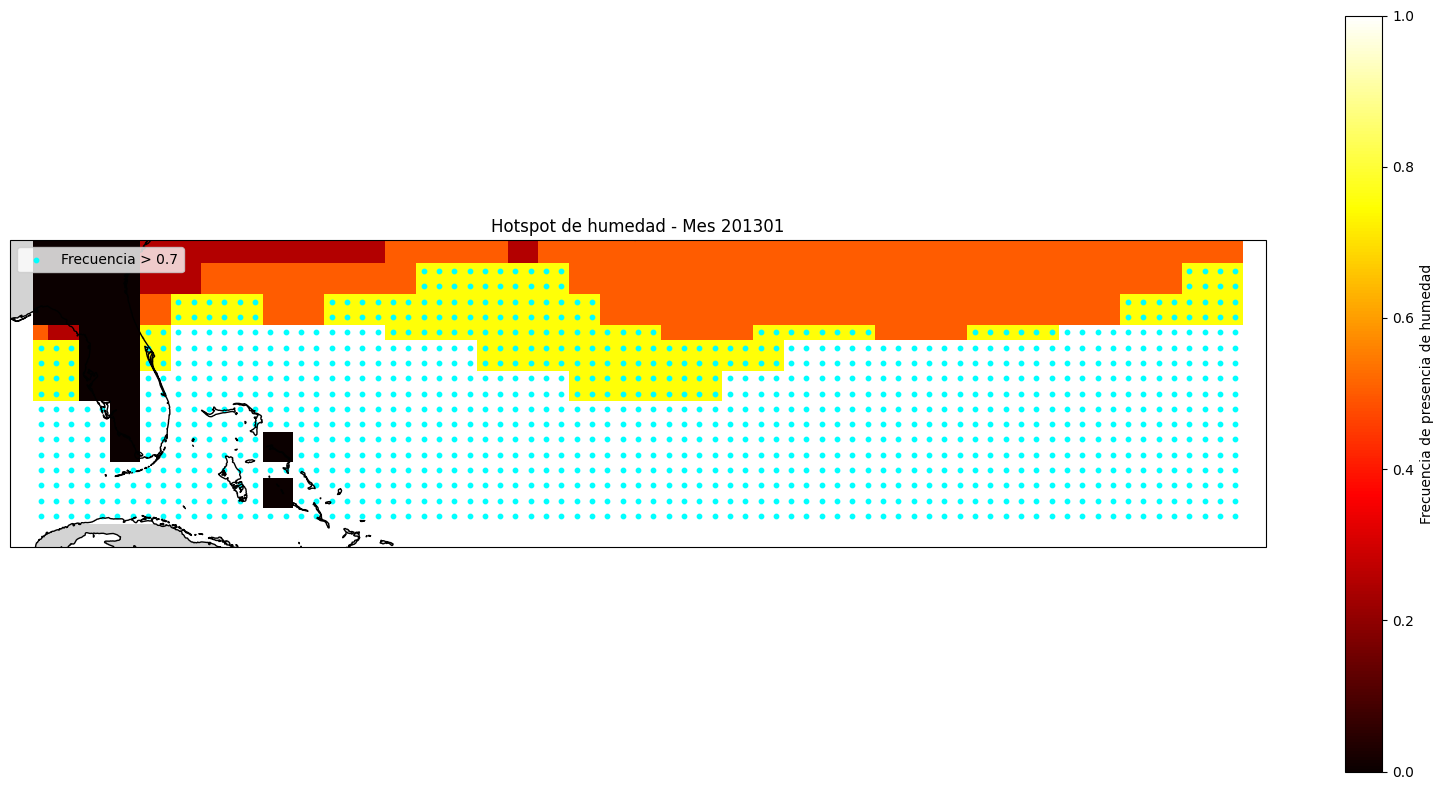

Mes 201302:
  Leyendo HUM_20130202_20130209.nc ...
  Leyendo HUM_20130210_20130217.nc ...
  Leyendo HUM_20130218_20130225.nc ...
  Leyendo HUM_20130226_20130305.nc ...
  Puntos con frecuencia > 0.7: 1056


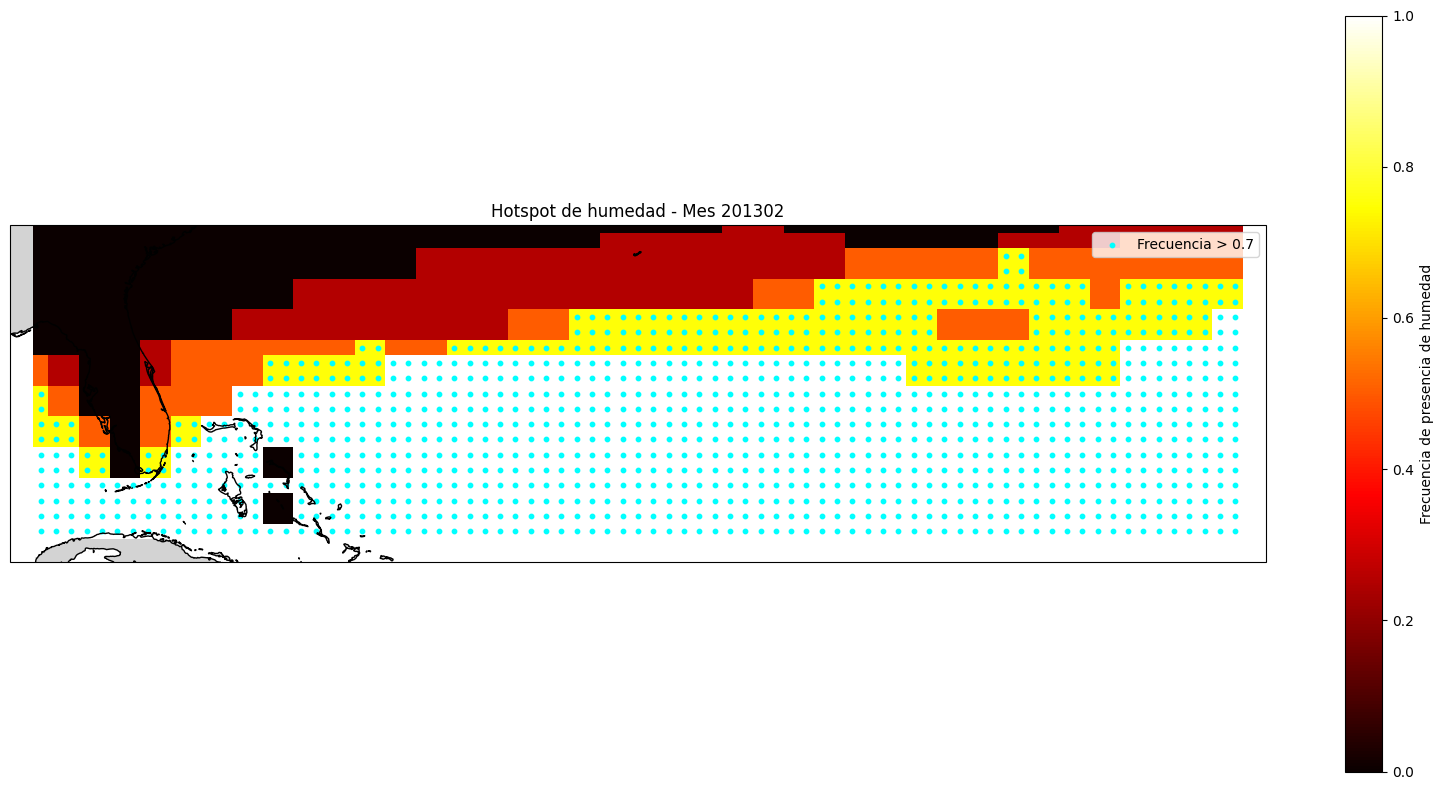

Mes 201303:
  Leyendo HUM_20130306_20130313.nc ...
  Leyendo HUM_20130314_20130321.nc ...
  Leyendo HUM_20130322_20130329.nc ...
  Leyendo HUM_20130330_20130406.nc ...
  Puntos con frecuencia > 0.7: 742


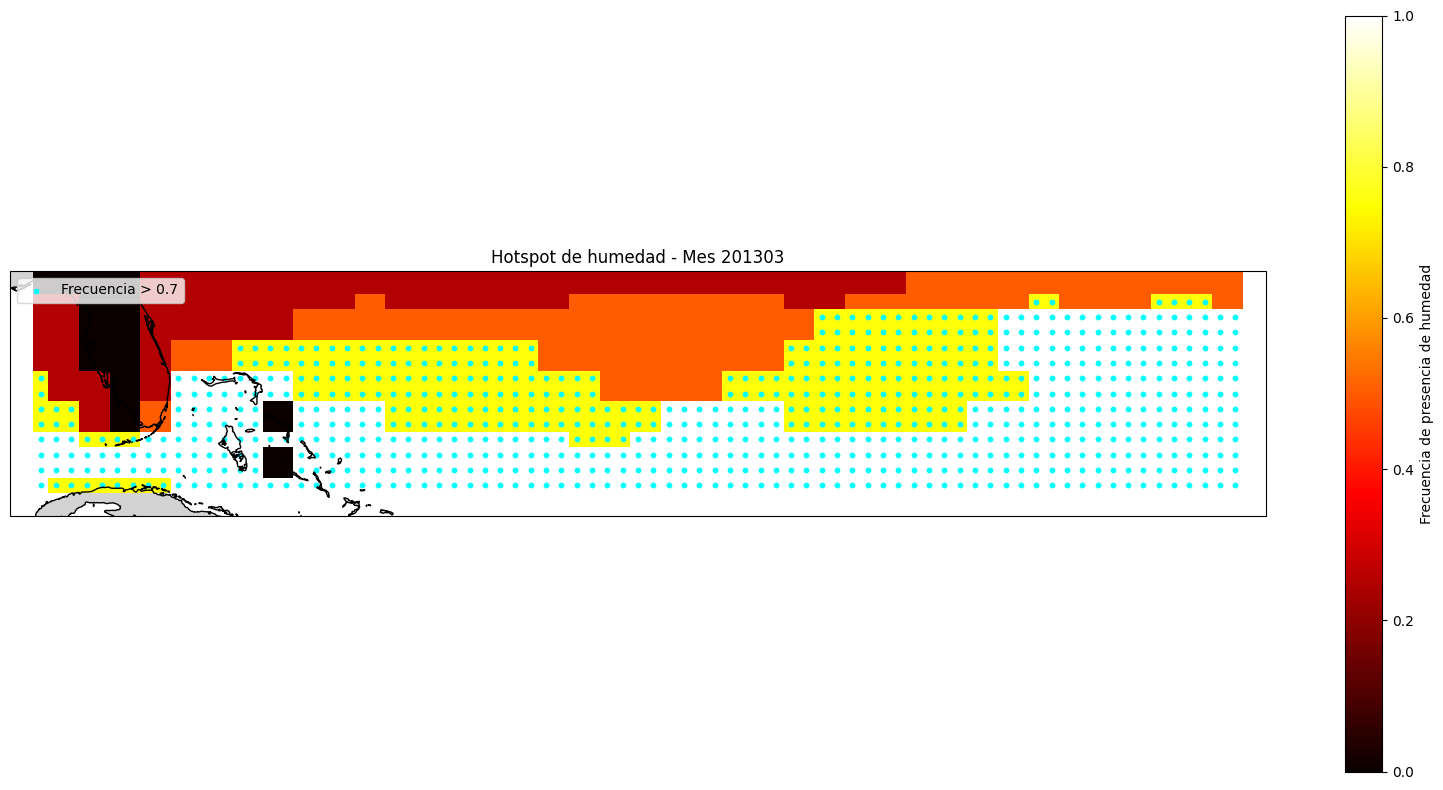

Mes 201304:
  Leyendo HUM_20130407_20130414.nc ...
  Leyendo HUM_20130415_20130422.nc ...
  Leyendo HUM_20130423_20130430.nc ...
  Puntos con frecuencia > 0.7: 1379


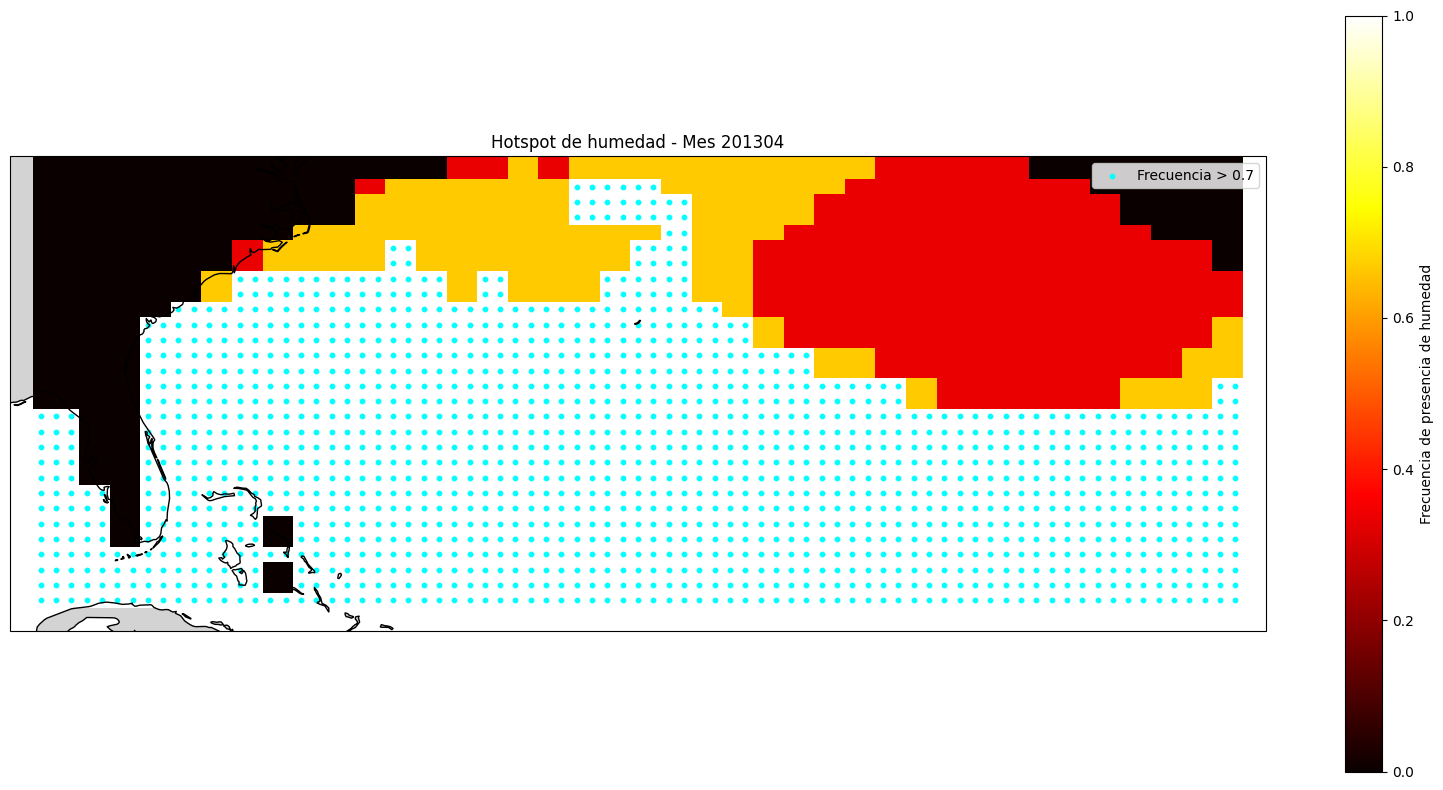

Mes 201305:
  Leyendo HUM_20130501_20130508.nc ...
  Leyendo HUM_20130509_20130516.nc ...
  Leyendo HUM_20130517_20130524.nc ...
  Leyendo HUM_20130525_20130601.nc ...
  Puntos con frecuencia > 0.7: 2073


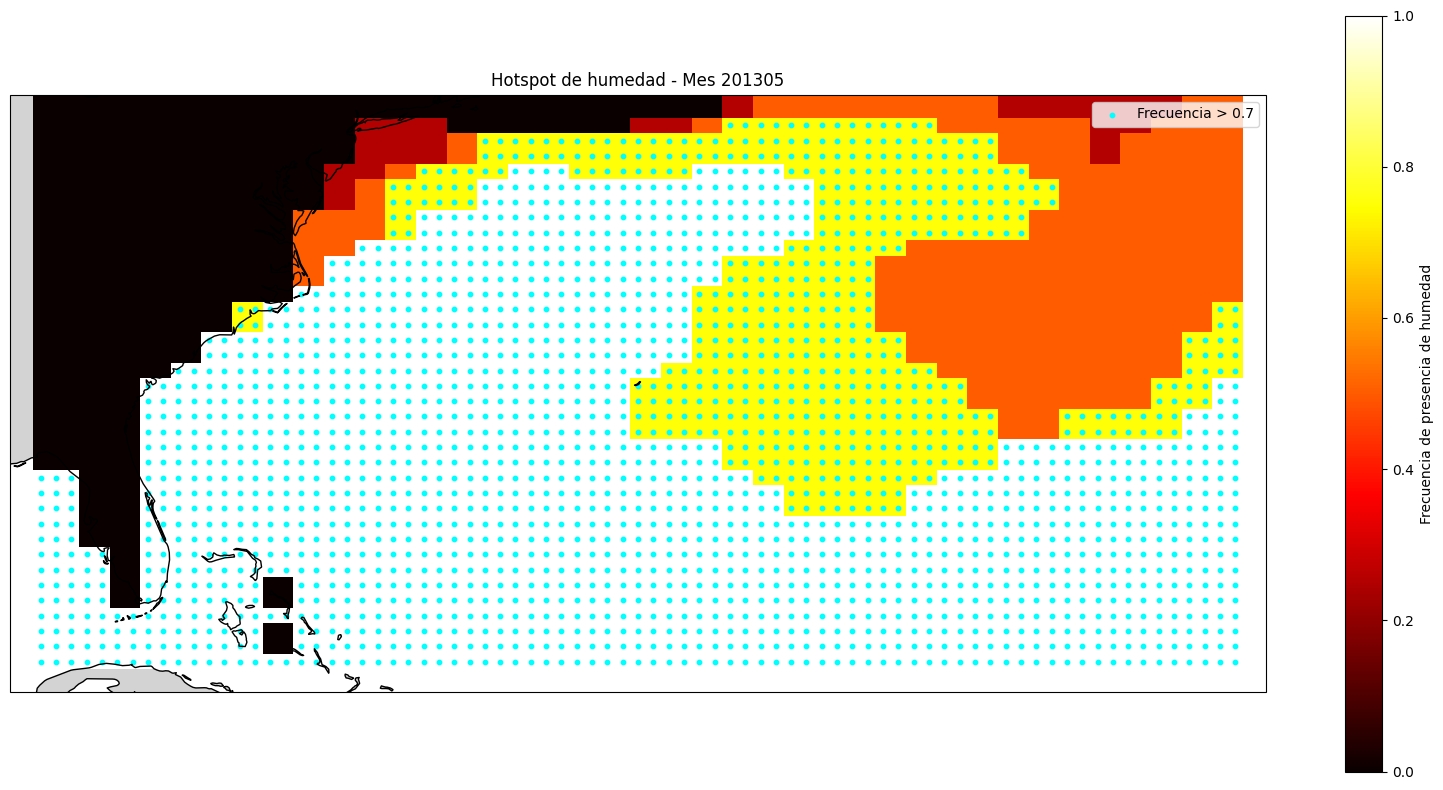

Mes 201306:
  Leyendo HUM_20130602_20130609.nc ...
  Leyendo HUM_20130610_20130617.nc ...
  Leyendo HUM_20130618_20130625.nc ...
  Puntos con frecuencia > 0.7: 2603


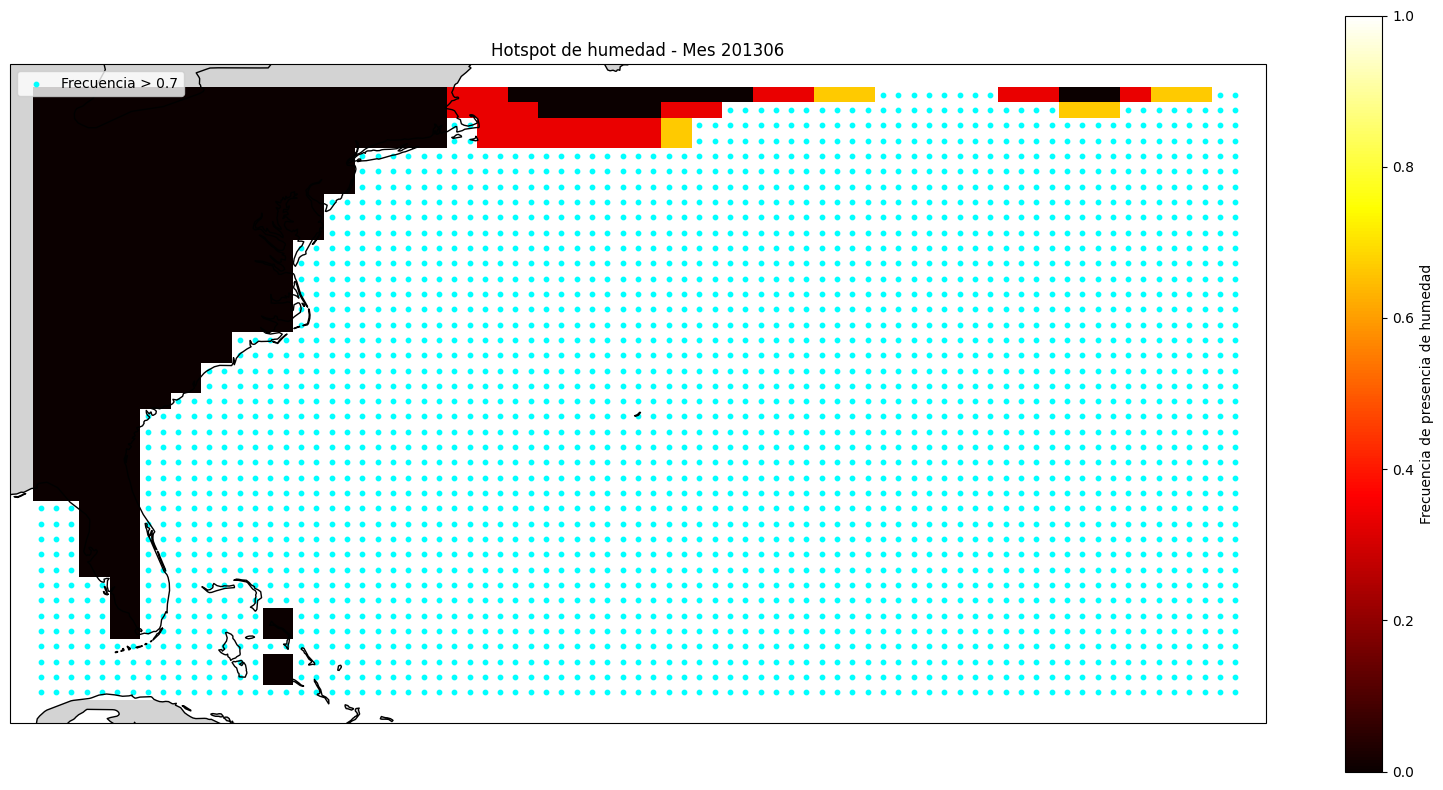


📊 Resumen de puntos extraídos:
Mes 201301: 1068 puntos con frecuencia > 0.7
Mes 201302: 1056 puntos con frecuencia > 0.7
Mes 201303: 742 puntos con frecuencia > 0.7
Mes 201304: 1379 puntos con frecuencia > 0.7
Mes 201305: 2073 puntos con frecuencia > 0.7
Mes 201306: 2603 puntos con frecuencia > 0.7


In [ ]:
import os
from collections import defaultdict
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion

# Ruta a la carpeta que contiene los archivos
carpeta = "data_hum"  # <-- CAMBIA esto por la ruta real

# Obtener todos los archivos .nc en la carpeta con ruta completa
archivos = [os.path.join(carpeta, f) for f in os.listdir(carpeta) if f.endswith(".nc")] 

# Diccionario para agrupar archivos por mes
archivos_por_mes = defaultdict(list)

for archivo in archivos:
    try:
        # Extraer solo el nombre del archivo para procesar la fecha
        nombre_archivo = os.path.basename(archivo)
        print(f"Procesando archivo: {nombre_archivo}")
        # Extraer la fecha de inicio del nombre del archivo
        partes = nombre_archivo.split('.')
        fecha_inicio = partes[0].split('_')[1]  # ejemplo: "20130101"
        mes = fecha_inicio[:6]  # ejemplo: "201301"

        archivos_por_mes[mes].append(archivo)  # Guardar ruta completa
    except IndexError:
        print(f"Formato inesperado en archivo: {os.path.basename(archivo)}")

data_hum = {}  # Diccionario para guardar puntos de humedad
# Mostrar resultados
for mes in sorted(archivos_por_mes):
        print(f"Mes {mes}:")
        
        chl_list = []
        for f in archivos_por_mes[mes]:
            
            print(f"  Leyendo {os.path.basename(f)} ...")
            ds = xr.open_dataset(f)
            chl = ds["EXFaqh"]
            chl_mask = (chl > 0.01).astype(int)  # máscara binaria
            chl_list.append(chl_mask)
            ds.close()

        # Apilar todas las semanas en una dimensión nueva "week"
        chl_stack = xr.concat(chl_list, dim='week')

        # Calcular frecuencia de presencia (0-1)
        hotmap = chl_stack.mean(dim='week')

        # -----------------------------------------------------------
        # Extraer puntos con frecuencia > 0.7
        # -----------------------------------------------------------
        # Crear máscara para puntos con alta frecuencia (> 0.7)
        mask_high = hotmap.values > 0.7
        
        # Obtener coordenadas correspondientes
        lats = hotmap["latitude"].values 
        lons = hotmap["longitude"].values
        lon_grid, lat_grid = np.meshgrid(lons, lats)

        # Filtrar los puntos con alta frecuencia
        lat_high = lat_grid[mask_high]
        lon_high = lon_grid[mask_high]
        
        print(f"  Puntos con frecuencia > 0.7: {len(lat_high)}")
        
        # Guardar en diccionario
        data_hum[mes] = (lon_high, lat_high)

        # -----------------------------------------------------------
        # Graficar hotspot map con puntos destacados
        # -----------------------------------------------------------
        plt.figure(figsize=(16,8))  # Formato horizontal
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        # Mostrar hotmap completo
        im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de humedad'})
        
        # Destacar puntos con frecuencia > 0.7
        if len(lat_high) > 0:
            plt.scatter(lon_high, lat_high, color="cyan", s=10, 
                       transform=ccrs.PlateCarree(), label="Frecuencia > 0.7")
            plt.legend()
        
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND, facecolor="lightgray")
        ax.set_title(f"Hotspot de humedad - Mes {mes}")
        
        # Ajustar límites si hay datos
        if len(lat_high) > 0:
            ax.set_extent([lon_high.min()-1, lon_high.max()+1, 
                          lat_high.min()-1, lat_high.max()+1], 
                         ccrs.PlateCarree())
        
        plt.tight_layout()
        plt.show()

# Mostrar resumen final
print("\n📊 Resumen de puntos extraídos:")
for mes, (lons, lats) in data_hum.items():
    print(f"Mes {mes}: {len(lats)} puntos con frecuencia > 0.7")

In [88]:
import joblib

#save as data_hum
joblib.dump(data_hum, 'C:\\Users\\josep\\OneDrive\\Escritorio\\space app\\data_map\\data_hum.pkl')

['C:\\Users\\josep\\OneDrive\\Escritorio\\space app\\data_map\\data_hum.pkl']

In [87]:
data_hum

{'201301': (array([-84.25, -83.75, -83.25, ..., -46.25, -45.75, -45.25], dtype=float32),
  array([23.25, 23.25, 23.25, ..., 31.25, 31.25, 31.25], dtype=float32)),
 '201302': (array([-84.25, -83.75, -83.25, ..., -52.25, -52.75, -52.25], dtype=float32),
  array([23.25, 23.25, 23.25, ..., 31.75, 32.25, 32.25], dtype=float32)),
 '201303': (array([-84.25, -83.75, -83.25, -82.75, -82.25, -81.75, -81.25, -80.75,
         -80.25, -79.75, -79.25, -78.75, -78.25, -77.75, -77.25, -76.75,
         -76.25, -75.75, -75.25, -74.75, -74.25, -73.75, -73.25, -72.75,
         -72.25, -71.75, -71.25, -70.75, -70.25, -69.75, -69.25, -68.75,
         -68.25, -67.75, -67.25, -66.75, -66.25, -65.75, -65.25, -64.75,
         -64.25, -63.75, -63.25, -62.75, -62.25, -61.75, -61.25, -60.75,
         -60.25, -59.75, -59.25, -58.75, -58.25, -57.75, -57.25, -56.75,
         -56.25, -55.75, -55.25, -54.75, -54.25, -53.75, -53.25, -52.75,
         -52.25, -51.75, -51.25, -50.75, -50.25, -49.75, -49.25, -48.75,
       

Procesando archivo: PRES_20130101_20130108.nc
Procesando archivo: PRES_20130109_20130116.nc
Procesando archivo: PRES_20130117_20130124.nc
Procesando archivo: PRES_20130125_20130201.nc
Procesando archivo: PRES_20130202_20130209.nc
Procesando archivo: PRES_20130210_20130217.nc
Procesando archivo: PRES_20130218_20130225.nc
Procesando archivo: PRES_20130226_20130305.nc
Procesando archivo: PRES_20130306_20130313.nc
Procesando archivo: PRES_20130314_20130321.nc
Procesando archivo: PRES_20130322_20130329.nc
Procesando archivo: PRES_20130330_20130406.nc
Procesando archivo: PRES_20130407_20130414.nc
Procesando archivo: PRES_20130415_20130422.nc
Procesando archivo: PRES_20130423_20130430.nc
Procesando archivo: PRES_20130501_20130508.nc
Procesando archivo: PRES_20130509_20130516.nc
Procesando archivo: PRES_20130517_20130524.nc
Procesando archivo: PRES_20130525_20130601.nc
Procesando archivo: PRES_20130602_20130609.nc
Procesando archivo: PRES_20130610_20130617.nc
Procesando archivo: PRES_20130618_

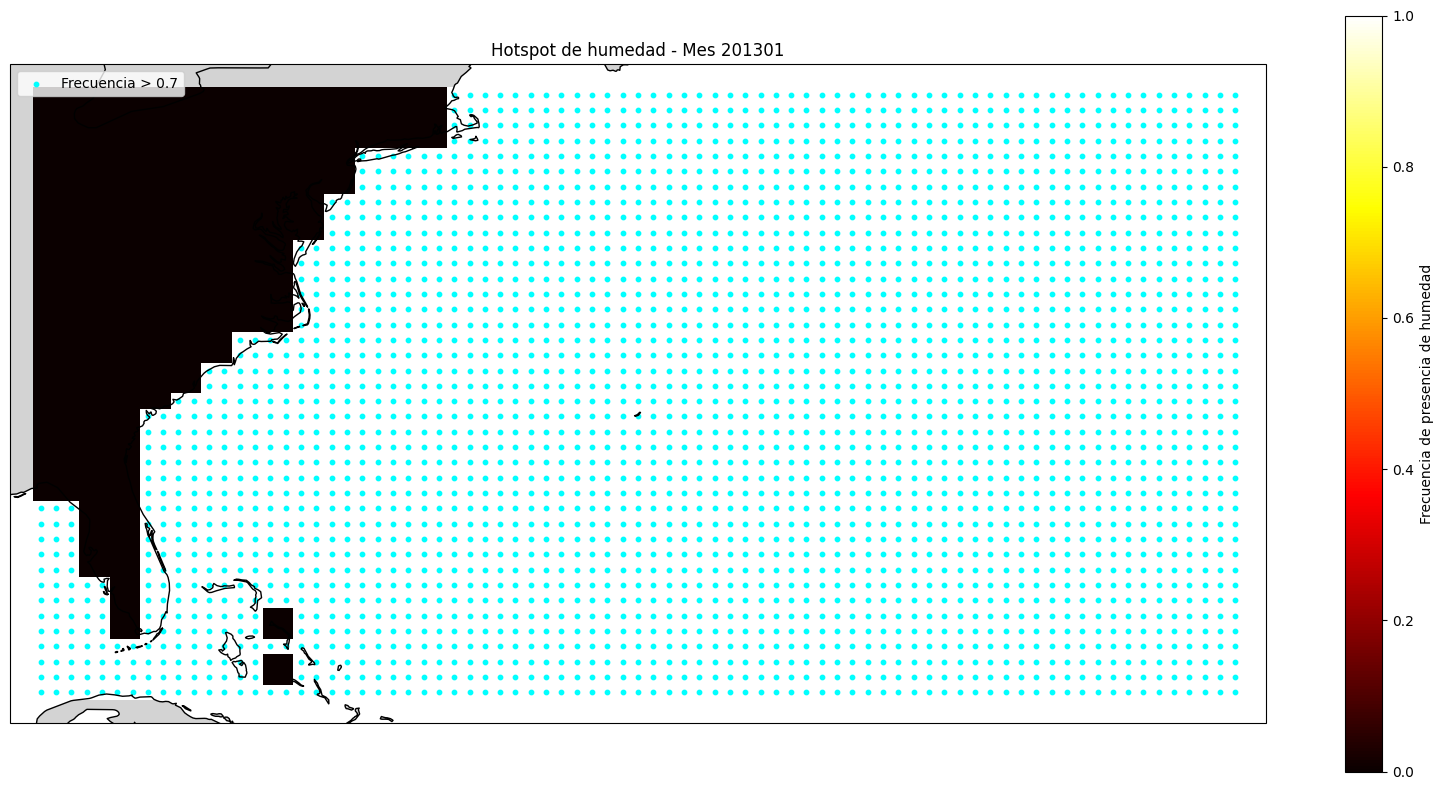

Mes 201302:
  Leyendo PRES_20130202_20130209.nc ...
  Leyendo PRES_20130210_20130217.nc ...
  Leyendo PRES_20130218_20130225.nc ...
  Leyendo PRES_20130226_20130305.nc ...
  Puntos con frecuencia > 0.7: 2695


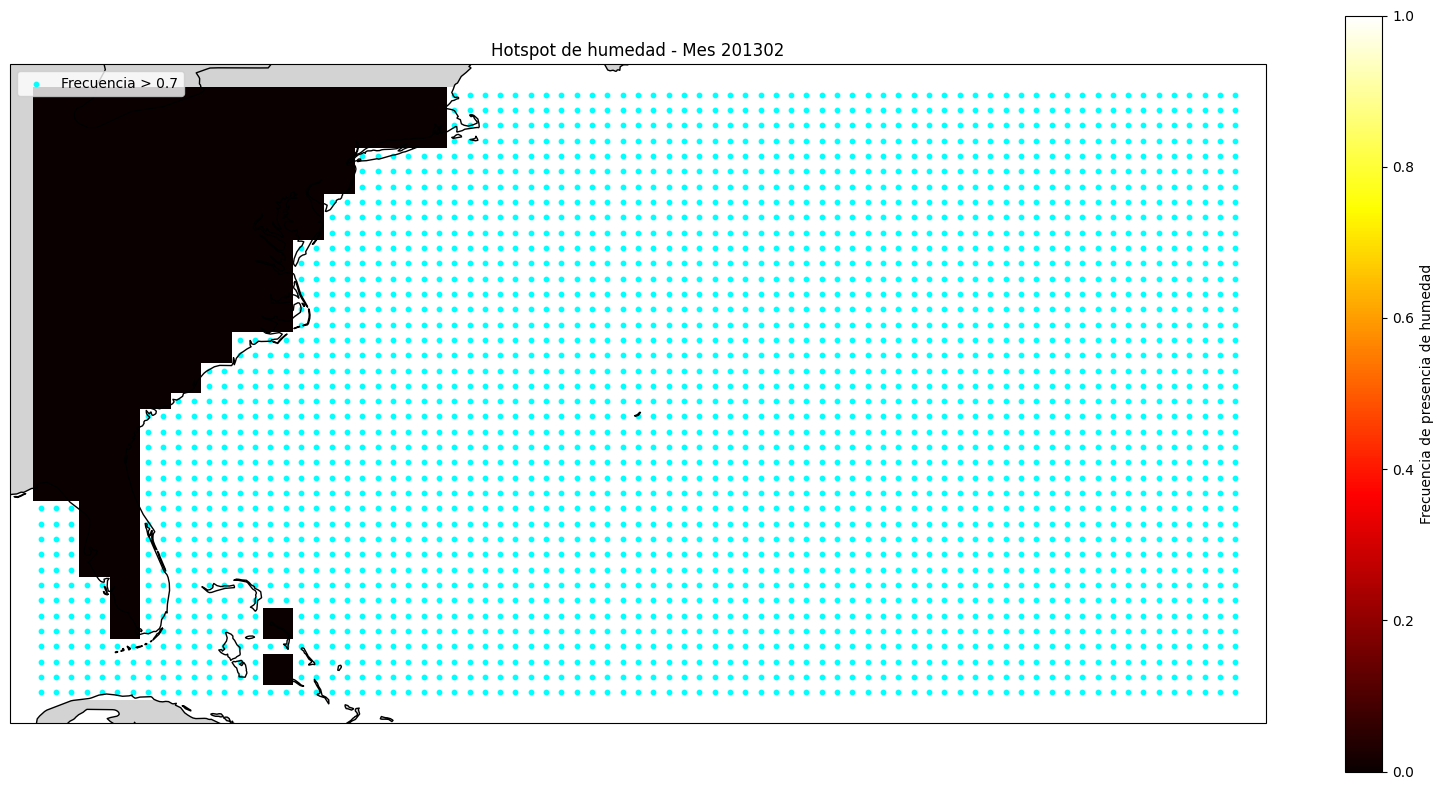

Mes 201303:
  Leyendo PRES_20130306_20130313.nc ...
  Leyendo PRES_20130314_20130321.nc ...
  Leyendo PRES_20130322_20130329.nc ...
  Leyendo PRES_20130330_20130406.nc ...
  Puntos con frecuencia > 0.7: 2695


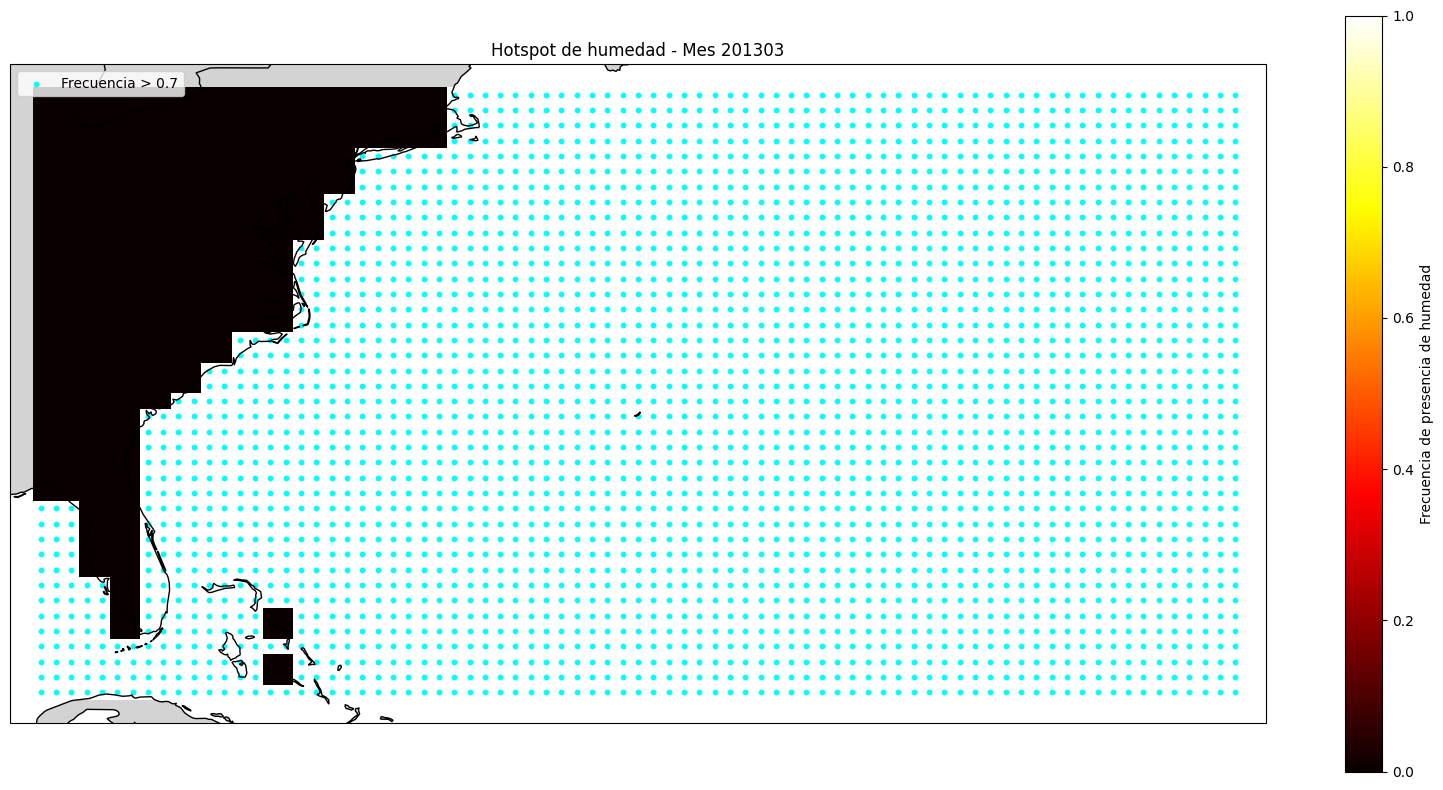

Mes 201304:
  Leyendo PRES_20130407_20130414.nc ...
  Leyendo PRES_20130415_20130422.nc ...
  Leyendo PRES_20130423_20130430.nc ...
  Puntos con frecuencia > 0.7: 2695


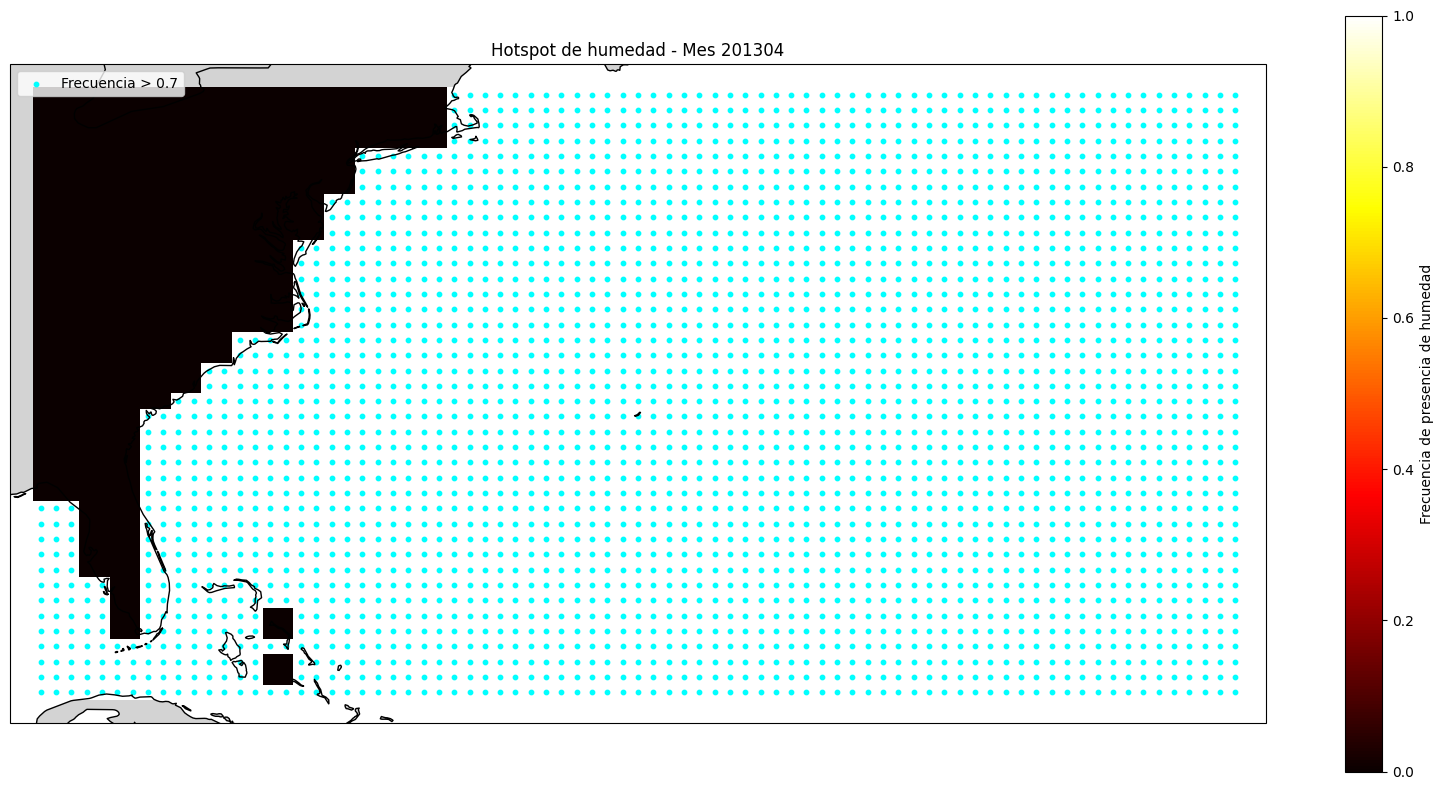

Mes 201305:
  Leyendo PRES_20130501_20130508.nc ...
  Leyendo PRES_20130509_20130516.nc ...
  Leyendo PRES_20130517_20130524.nc ...
  Leyendo PRES_20130525_20130601.nc ...
  Puntos con frecuencia > 0.7: 2695


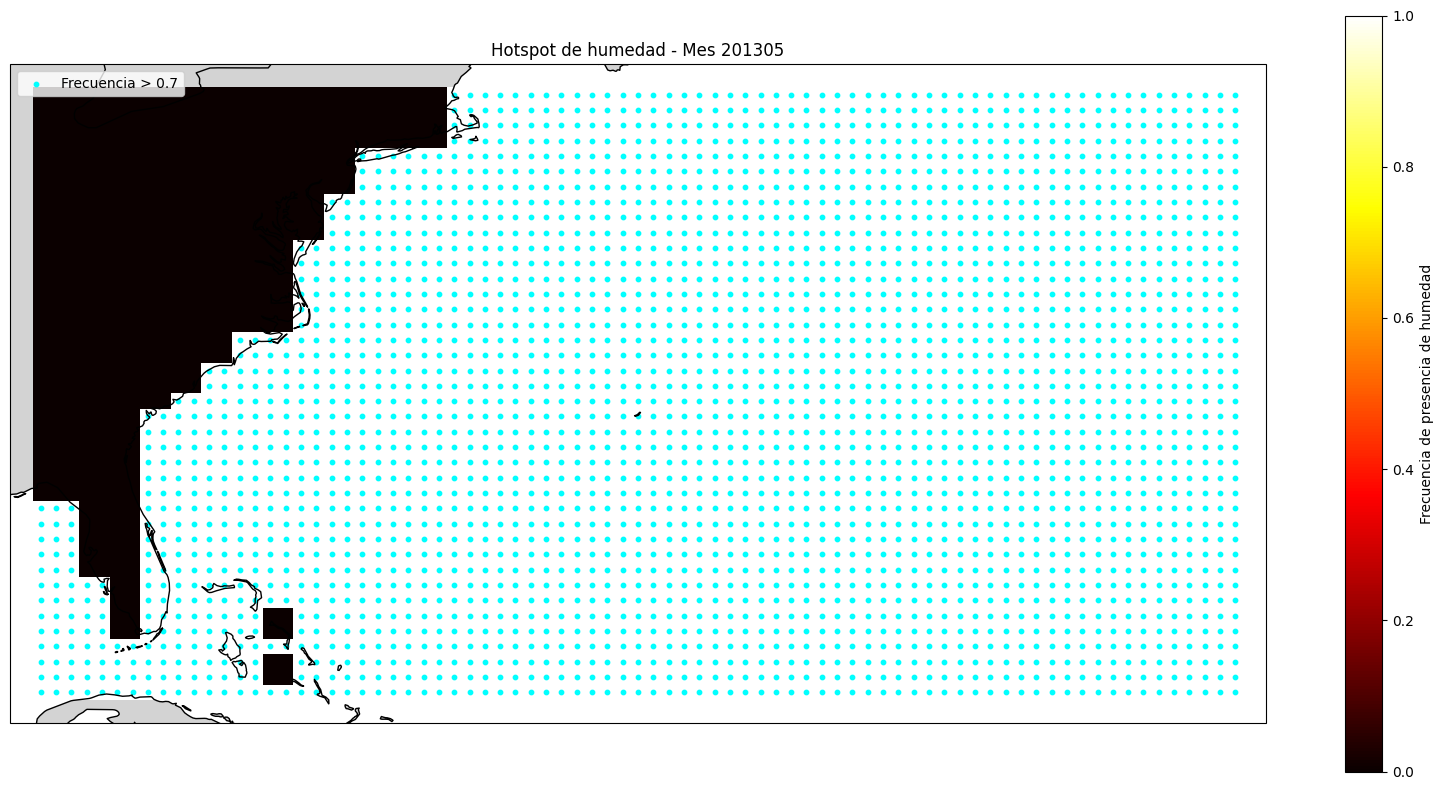

Mes 201306:
  Leyendo PRES_20130602_20130609.nc ...
  Leyendo PRES_20130610_20130617.nc ...
  Leyendo PRES_20130618_20130625.nc ...
  Puntos con frecuencia > 0.7: 2695


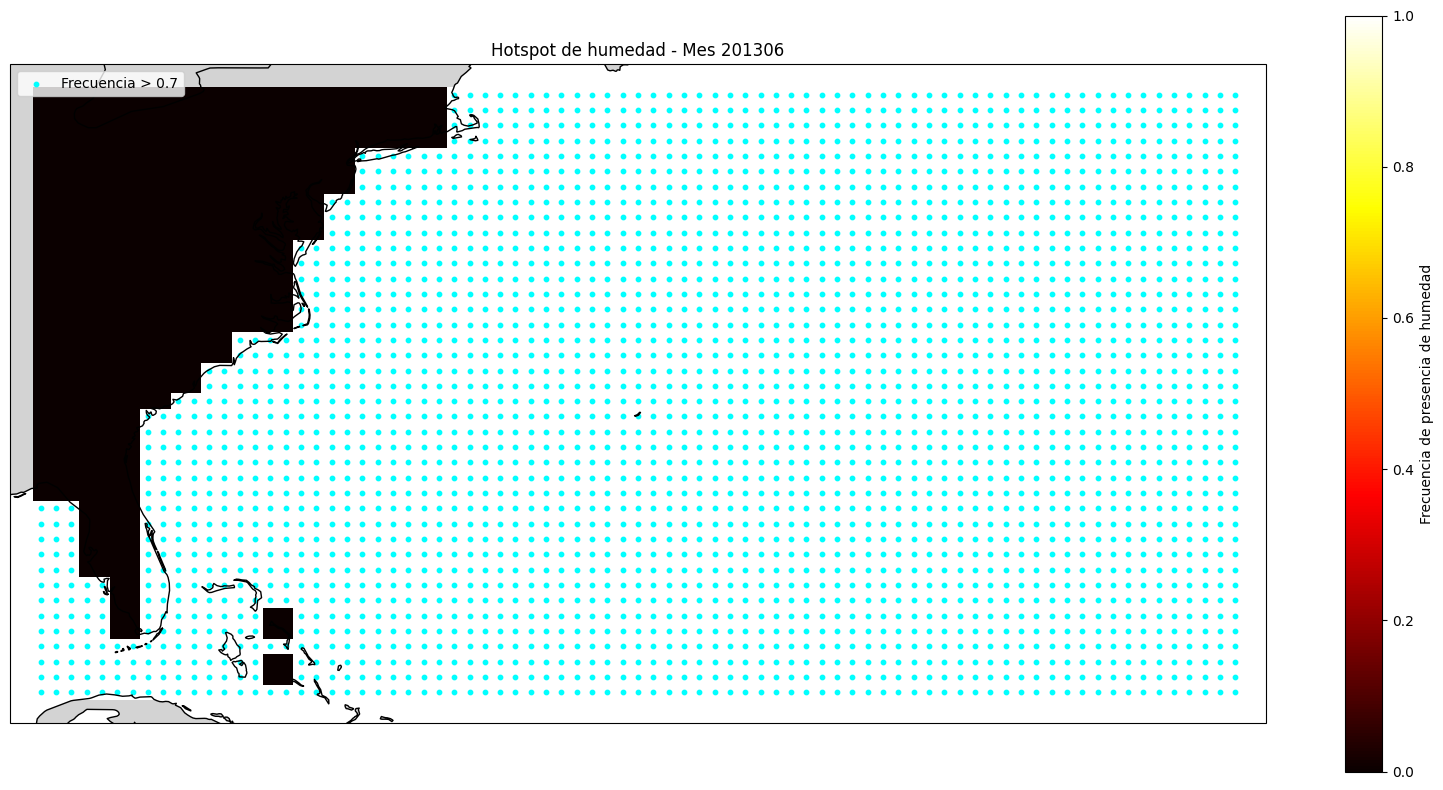


📊 Resumen de puntos extraídos:
Mes 201301: 2695 puntos con frecuencia > 0.7
Mes 201302: 2695 puntos con frecuencia > 0.7
Mes 201303: 2695 puntos con frecuencia > 0.7
Mes 201304: 2695 puntos con frecuencia > 0.7
Mes 201305: 2695 puntos con frecuencia > 0.7
Mes 201306: 2695 puntos con frecuencia > 0.7


In [ ]:
import os
from collections import defaultdict
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion

# Ruta a la carpeta que contiene los archivos
carpeta = "/data_pres"  # <-- CAMBIA esto por la ruta real

# Obtener todos los archivos .nc en la carpeta con ruta completa
archivos = [os.path.join(carpeta, f) for f in os.listdir(carpeta) if f.endswith(".nc")] 

# Diccionario para agrupar archivos por mes
archivos_por_mes = defaultdict(list)

for archivo in archivos:
    try:
        # Extraer solo el nombre del archivo para procesar la fecha
        nombre_archivo = os.path.basename(archivo)
        print(f"Procesando archivo: {nombre_archivo}")
        # Extraer la fecha de inicio del nombre del archivo
        partes = nombre_archivo.split('.')
        fecha_inicio = partes[0].split('_')[1]  # ejemplo: "20130101"
        mes = fecha_inicio[:6]  # ejemplo: "201301"

        archivos_por_mes[mes].append(archivo)  # Guardar ruta completa
    except IndexError:
        print(f"Formato inesperado en archivo: {os.path.basename(archivo)}")

data_hum = {}  # Diccionario para guardar puntos de humedad
# Mostrar resultados
for mes in sorted(archivos_por_mes):
        print(f"Mes {mes}:")
        
        chl_list = []
        for f in archivos_por_mes[mes]:
            
            print(f"  Leyendo {os.path.basename(f)} ...")
            ds = xr.open_dataset(f)
            chl = ds["EXFpress"]
            chl_mask = (chl > 0.05).astype(int)  # máscara binaria
            chl_list.append(chl_mask)
            ds.close()

        # Apilar todas las semanas en una dimensión nueva "week"
        chl_stack = xr.concat(chl_list, dim='week')

        # Calcular frecuencia de presencia (0-1)
        hotmap = chl_stack.mean(dim='week')

        # -----------------------------------------------------------
        # Extraer puntos con frecuencia > 0.7
        # -----------------------------------------------------------
        # Crear máscara para puntos con alta frecuencia (> 0.7)
        mask_high = hotmap.values > 0.001
        
        # Obtener coordenadas correspondientes
        lats = hotmap["latitude"].values 
        lons = hotmap["longitude"].values
        lon_grid, lat_grid = np.meshgrid(lons, lats)

        # Filtrar los puntos con alta frecuencia
        lat_high = lat_grid[mask_high]
        lon_high = lon_grid[mask_high]
        
        print(f"  Puntos con frecuencia > 0.7: {len(lat_high)}")
        
        # Guardar en diccionario
        data_hum[mes] = (lon_high, lat_high)

        # -----------------------------------------------------------
        # Graficar hotspot map con puntos destacados
        # -----------------------------------------------------------
        plt.figure(figsize=(16,8))  # Formato horizontal
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        # Mostrar hotmap completo
        im = hotmap.plot(ax=ax, cmap='hot', cbar_kwargs={'label':'Frecuencia de presencia de humedad'})
        
        # Destacar puntos con frecuencia > 0.7
        if len(lat_high) > 0:
            plt.scatter(lon_high, lat_high, color="cyan", s=10, 
                       transform=ccrs.PlateCarree(), label="Frecuencia > 0.7")
            plt.legend()
        
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND, facecolor="lightgray")
        ax.set_title(f"Hotspot de humedad - Mes {mes}")
        
        # Ajustar límites si hay datos
        if len(lat_high) > 0:
            ax.set_extent([lon_high.min()-1, lon_high.max()+1, 
                          lat_high.min()-1, lat_high.max()+1], 
                         ccrs.PlateCarree())
        
        plt.tight_layout()
        plt.show()

# Mostrar resumen final
print("\n📊 Resumen de puntos extraídos:")
for mes, (lons, lats) in data_hum.items():
    print(f"Mes {mes}: {len(lats)} puntos con frecuencia > 0.7")